In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv('Sparkling.csv')
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [ ]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
df.shape

(187, 2)

In [ ]:
date1 = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date1

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [ ]:
df['Time_new'] = pd.DataFrame(date1)


In [ ]:
df.set_index('Time_new',inplace=True)
df.head()

YearMonth  Sparkling
Time_new                       
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [ ]:
df.drop("YearMonth", inplace=True, axis=1)


In [ ]:
df

Sparkling
Time_new             
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

[187 rows x 1 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


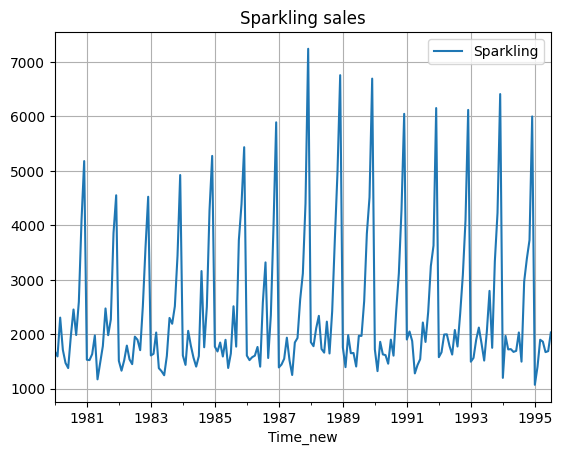

In [ ]:
df.plot()
plt.title("Sparkling sales")
plt.grid();

In [ ]:
df.shape

(187, 1)

In [ ]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [ ]:
dfcopy =df.copy()

In [ ]:
dfcopy['Year']=df.index.year
dfcopy['Month']=df.index.month
dfcopy.head()

Sparkling  Year  Month
Time_new                          
1980-01-31       1686  1980      1
1980-02-29       1591  1980      2
1980-03-31       2304  1980      3
1980-04-30       1712  1980      4
1980-05-31       1471  1980      5

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Specify the file path and name for the Excel file
file_path = '/content/dfcopy.xlsx'

# Save the DataFrame as an Excel file
dfcopy.to_excel(file_path, index=False)

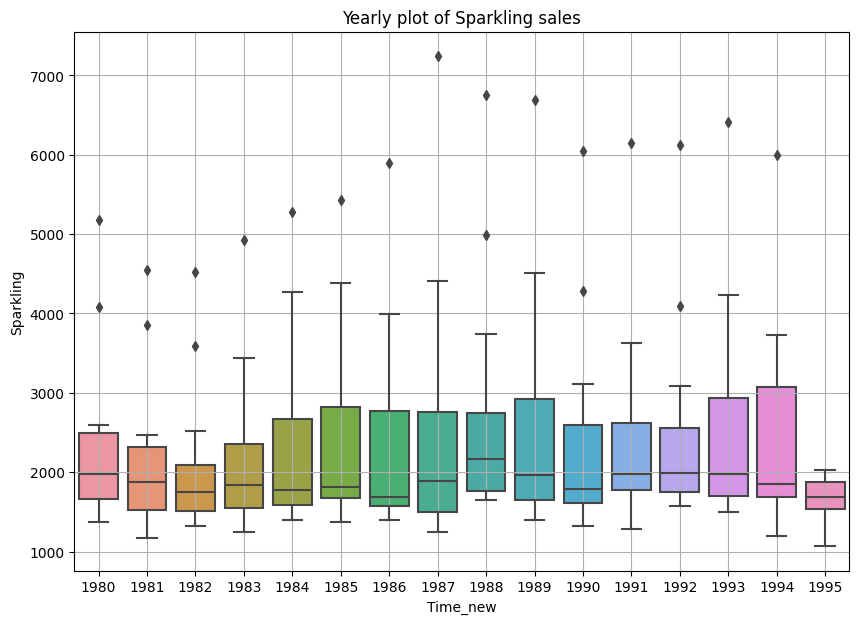

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.title("Yearly plot of Sparkling sales")
plt.grid();

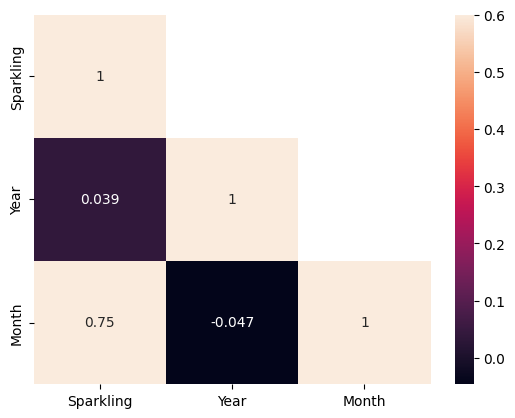

In [ ]:
corr1= dfcopy.corr()
f = np.array(corr1)
f[np.tril_indices_from(f)] = False

sns.heatmap(corr1, mask=f,vmax=.6,annot=True);
plt.show()

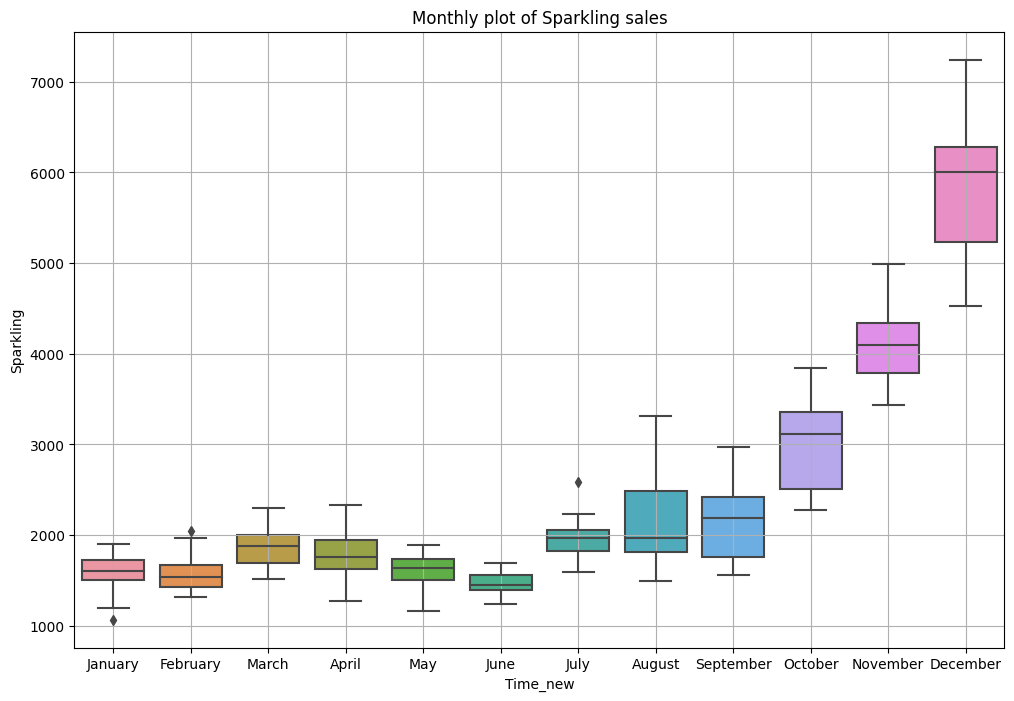

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.title("Monthly plot of Sparkling sales")
plt.grid();

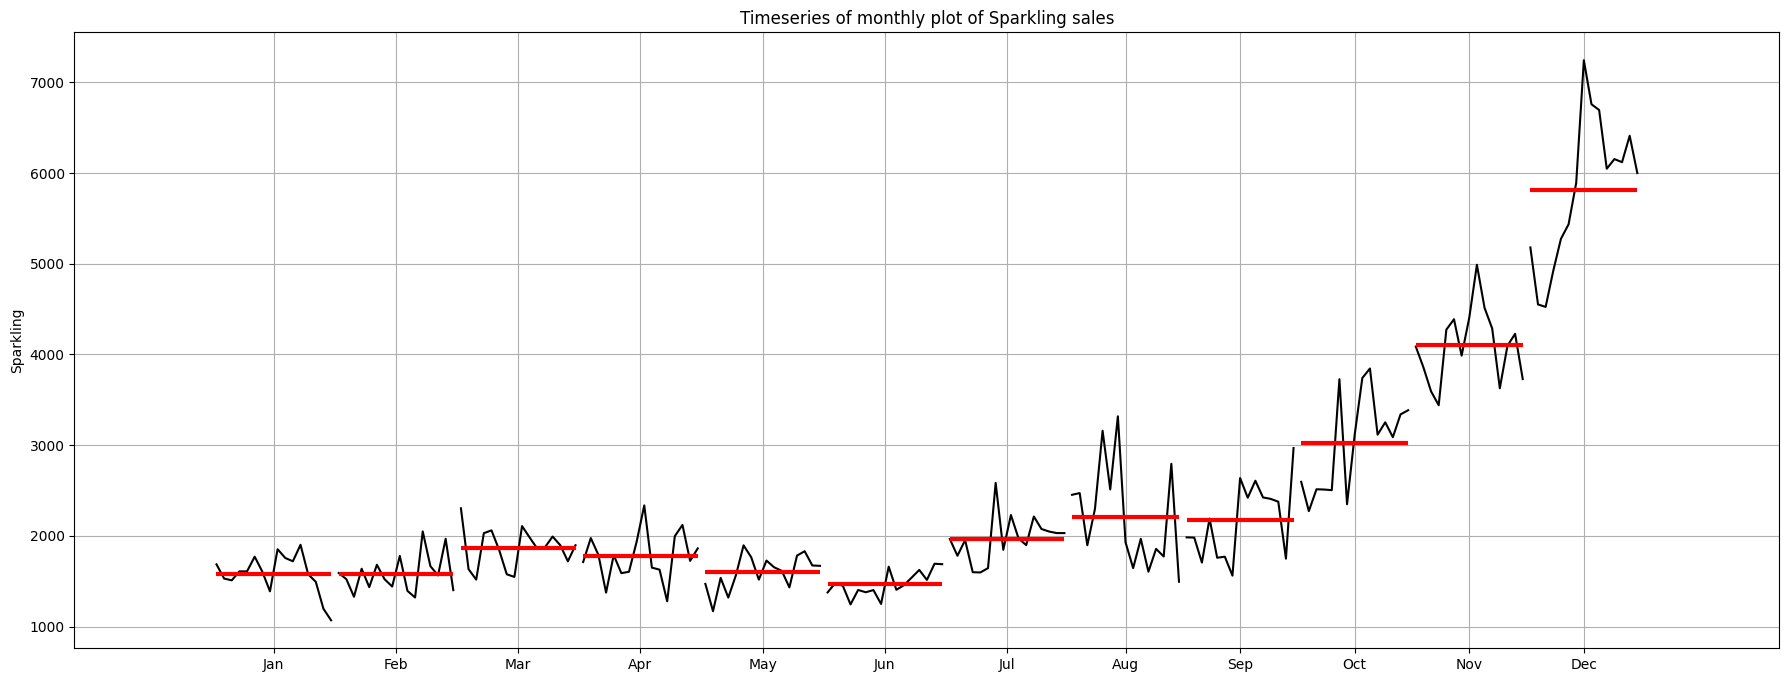

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Sparkling',ax=ax)
plt.title("Timeseries of monthly plot of Sparkling sales")
plt.grid();

In [ ]:
monthly_sales_by_years = pd.pivot_table(df, values = 'Sparkling',  index = df.index.month, columns = df.index.year)
monthly_sales_by_years

Time_new    1980    1981    1982    1983    1984    1985    1986    1987  \
Time_new                                                                   
1         1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0   
2         1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0   
3         2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0   
4         1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0   
5         1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0   
6         1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0   
7         1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0   
8         2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0   
9         1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0   
10        2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0   
11        4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0   
12        5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0   

Time_new    1988    1989    1990    1991    1992    1993    1994    1995  
Time_new                                                                  
1         1853.0  1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
2         1779.0  1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
3         2108.0  1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
4         2336.0  1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
5         1728.0  1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
6         1661.0  1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
7         2230.0  1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
8         1645.0  1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
9         2421.0  2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
10        3740.0  3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
11        4988.0  4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
12        6757.0  6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

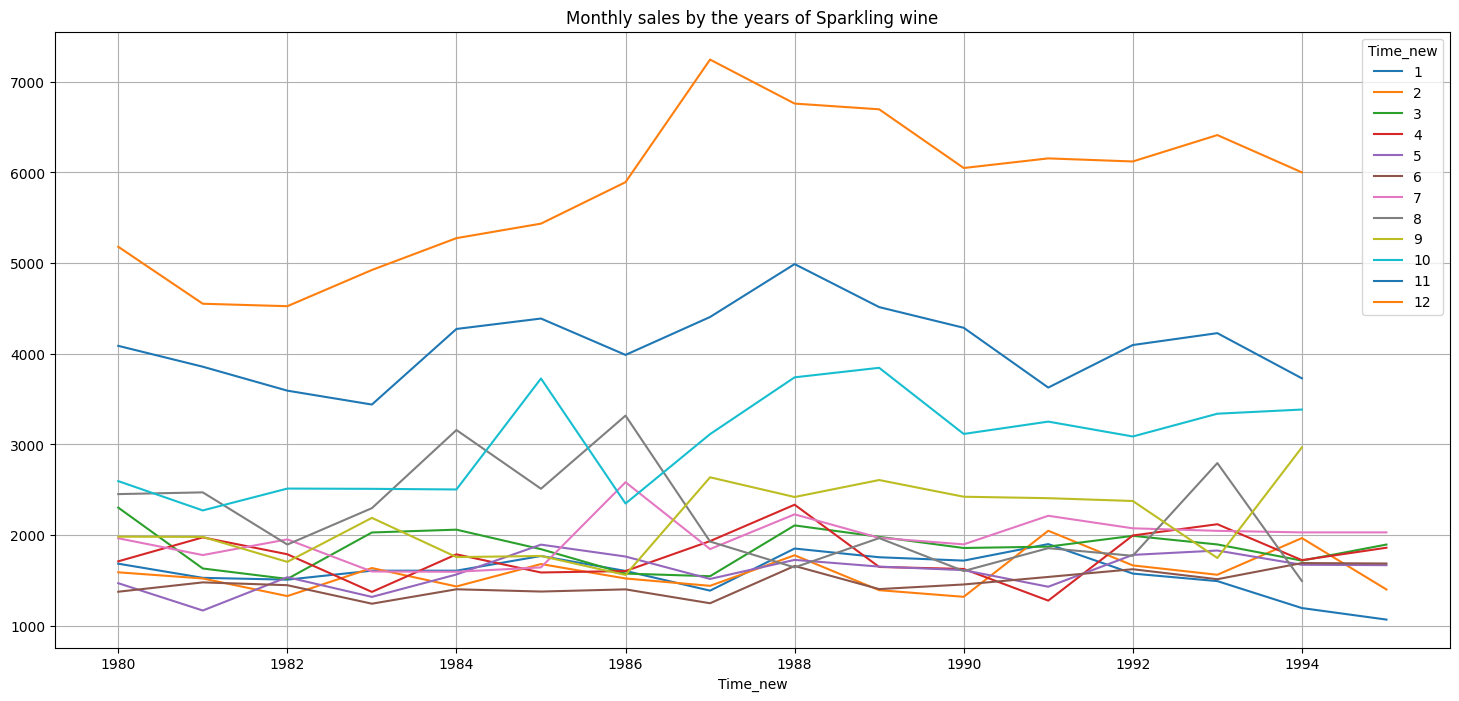

In [ ]:

fig, ax = plt.subplots(figsize=(18,8))
monthly_sales_by_years.T.plot(ax=ax)
plt.grid()
plt.title("Monthly sales by the years of Sparkling wine");


In [ ]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Sparkling
Time_new             
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

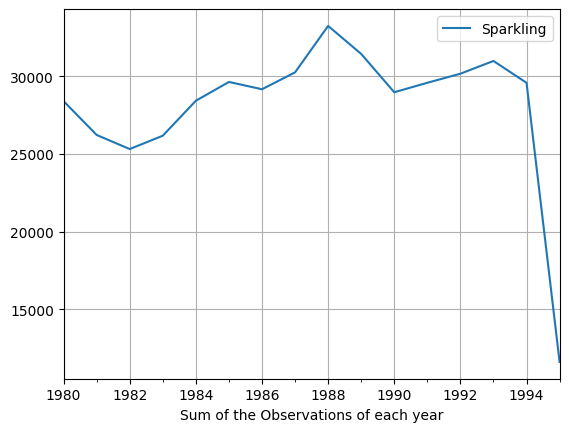

In [ ]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [ ]:
df_yearly_mean = df.resample('Y').mean().round(2)
df_yearly_mean.head()

Sparkling
Time_new             
1980-12-31    2367.17
1981-12-31    2185.58
1982-12-31    2110.08
1983-12-31    2181.67
1984-12-31    2369.25

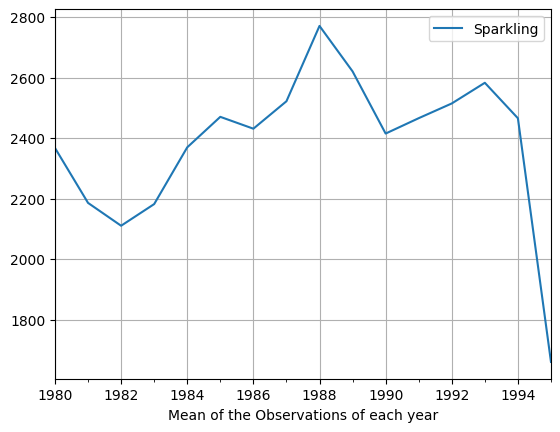

In [ ]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

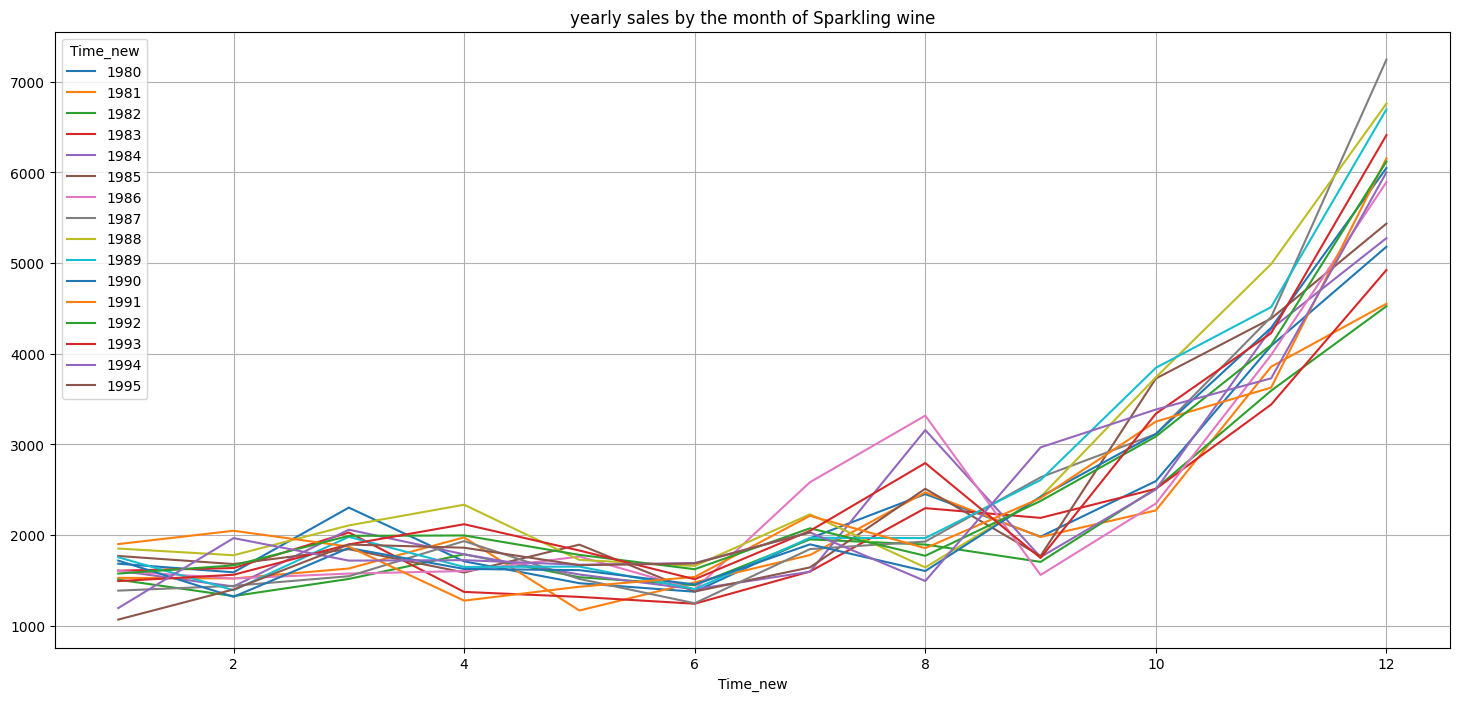

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
monthly_sales_by_years.plot(ax=ax)
plt.grid()
plt.title("yearly sales by the month of Sparkling wine");

In [ ]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
Time_new             
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

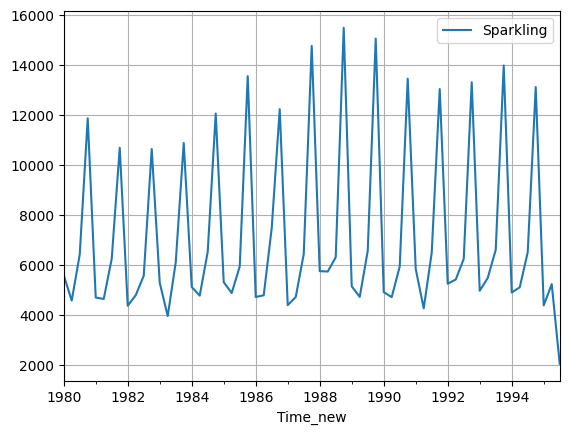

In [ ]:
df_quarterly_sum.plot();
plt.grid()

In [ ]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
Time_new               
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

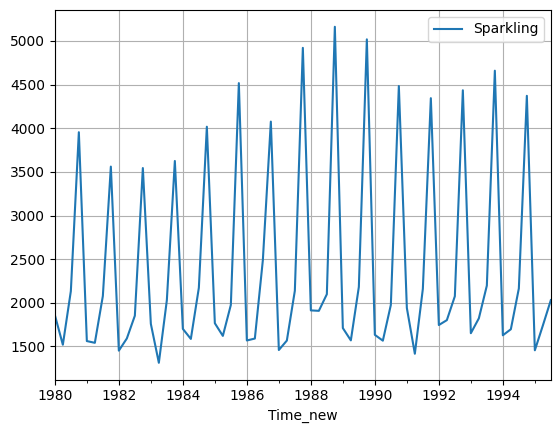

In [ ]:
df_quarterly_mean.plot();
plt.grid()

In [ ]:
df_daily_sum = df.resample('D').sum()
df_daily_sum

Sparkling
Time_new             
1980-01-31       1686
1980-02-01          0
1980-02-02          0
1980-02-03          0
1980-02-04          0
...               ...
1995-07-27          0
1995-07-28          0
1995-07-29          0
1995-07-30          0
1995-07-31       2031

[5661 rows x 1 columns]

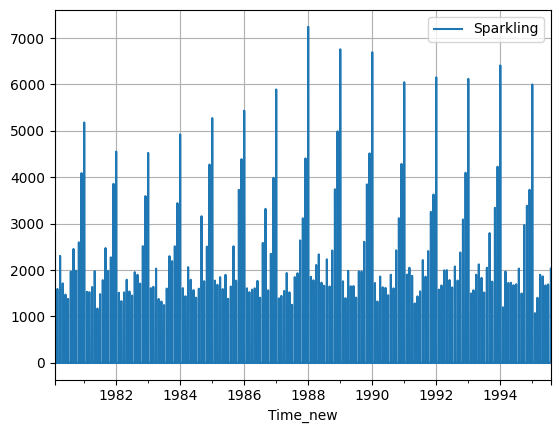

In [ ]:
df_daily_sum.plot()
plt.grid();

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

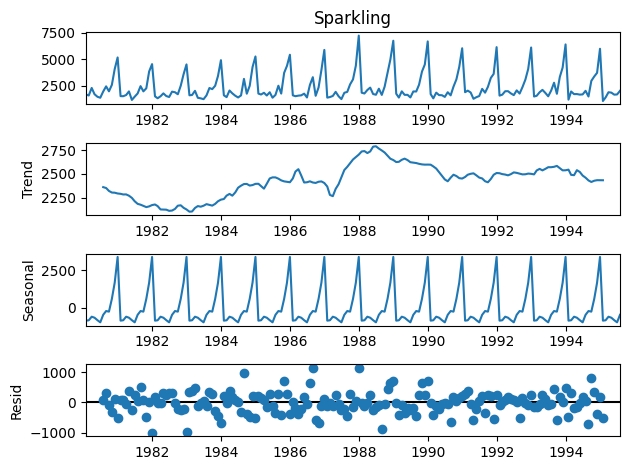

In [ ]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

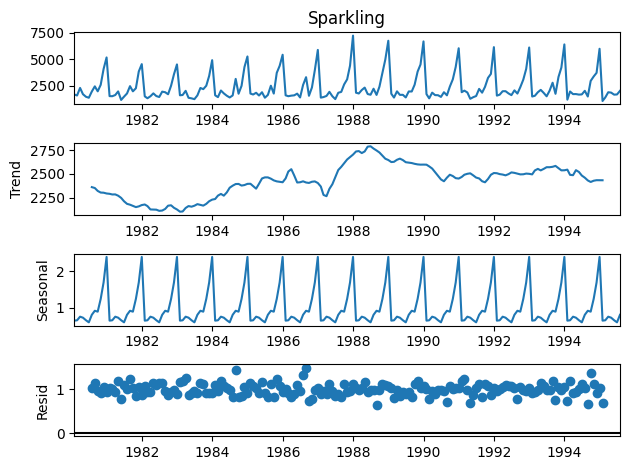

In [ ]:

decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_new
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_new
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_new
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: resid, 

In [ ]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.round(2).head(12)

Time_new
1980-01-31        NaN
1980-02-29        NaN
1980-03-31        NaN
1980-04-30        NaN
1980-05-31        NaN
1980-06-30        NaN
1980-07-31    2361.70
1980-08-31    2352.47
1980-09-30    2321.50
1980-10-31    2304.49
1980-11-30    2303.09
1980-12-31    2294.74
dtype: float64

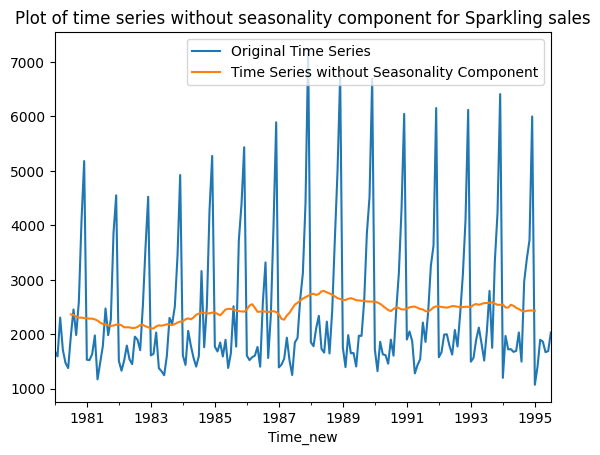

In [ ]:
df.plot()
deaseasonalized_ts.plot()
plt.title("Plot of time series without seasonality component for Sparkling sales")
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [ ]:
train_df=df[df.index.year < 1991]
test_df=df[df.index.year >= 1991]

In [ ]:
from IPython.display import display
print('First few rows of Training Data')
display(train_df.head())
print('Last few rows of Training Data')
display(train_df.tail())
print('First few rows of Test Data')
display(test_df.head())
print('Last few rows of Test Data')
display(test_df.tail())

First few rows of Training Data


Sparkling
Time_new             
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_new             
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_new             
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_new             
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [ ]:
print("Shape of train set ",train_df.shape)
print("Shape of test set ",test_df.shape)

Shape of train set  (132, 1)
Shape of test set  (55, 1)


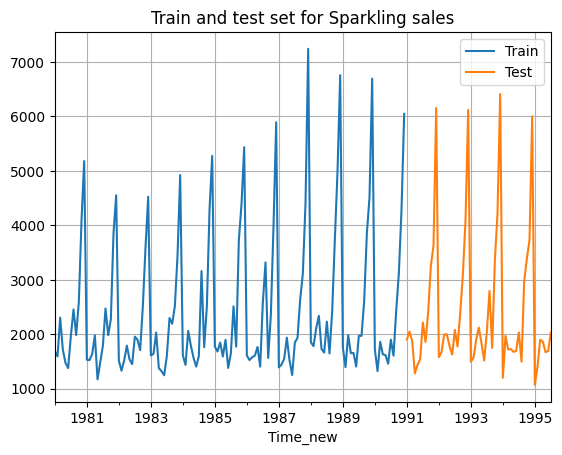

In [ ]:
train_df['Sparkling'].plot(label='Train')
test_df['Sparkling'].plot(label='Test')
plt.grid()
plt.legend(loc='best')
plt.title("Train and test set for Sparkling sales");

In [ ]:
train_time_df = [i+1 for i in range(len(train_df))]
test_time_df = [i+133 for i in range(len(test_df))]
print("Train time :\n", train_time_df)
print("Test time :\n",test_time_df)

Train time :
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test time :
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [ ]:
LinearReg_train_df = train_df.copy()
LinearReg_test_df= test_df.copy()

In [ ]:
LinearReg_train_df['Time'] = train_time_df
LinearReg_test_df['Time'] = test_time_df

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(LinearReg_train_df[['Time']], LinearReg_train_df['Sparkling'].values)

LinearRegression()

In [ ]:
test_prediction_model = lr.predict(LinearReg_test_df[['Time']])
LinearReg_test_df['RegOnTime'] = test_prediction_model

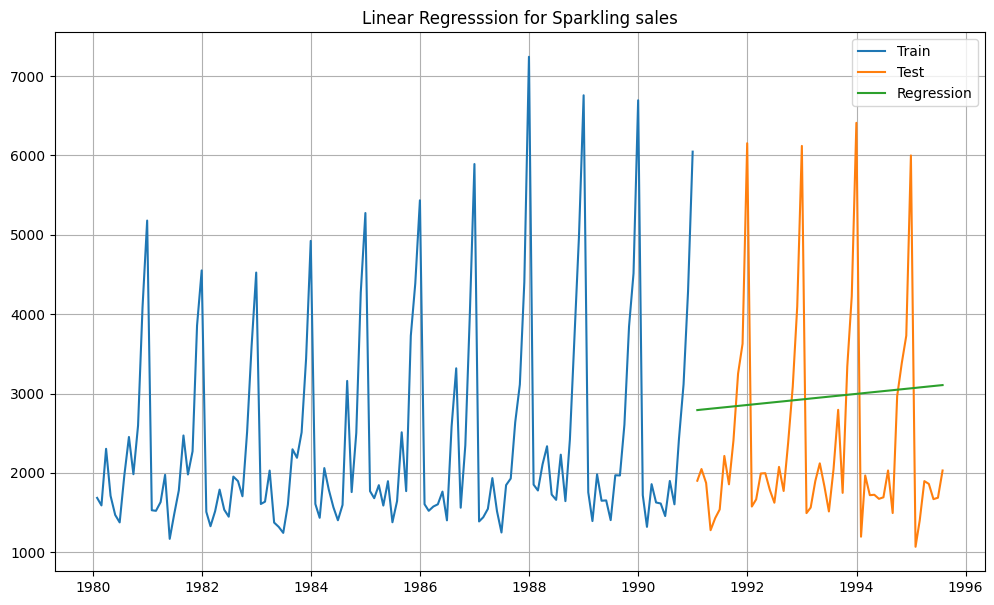

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(train_df['Sparkling'],label='Train')
plt.plot(test_df['Sparkling'],label='Test')
plt.plot(LinearReg_test_df['RegOnTime'], label='Regression')
plt.grid()
plt.legend(loc='best')
plt.title("Linear Regresssion for Sparkling sales");

In [ ]:
from sklearn import metrics

In [ ]:
rmse_model_test = metrics.mean_squared_error(test_df['Sparkling'],test_prediction_model, squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %.2f" %rmse_model_test)

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.14


In [ ]:
results_df = pd.DataFrame({'Test RMSE': [rmse_model_test]},index=['Regresion On Time'])
results_df

Test RMSE
Regresion On Time  1389.135175

In [ ]:
naive_test_df = test_df.copy()
naive_train_df = train_df.copy()
naive_train_df.tail()

Sparkling
Time_new             
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [ ]:
train_shape11 = naive_train_df.shape[0]
train_shape11

132

In [ ]:
naive_test_df['predict'] = naive_train_df['Sparkling'][train_shape11-1]

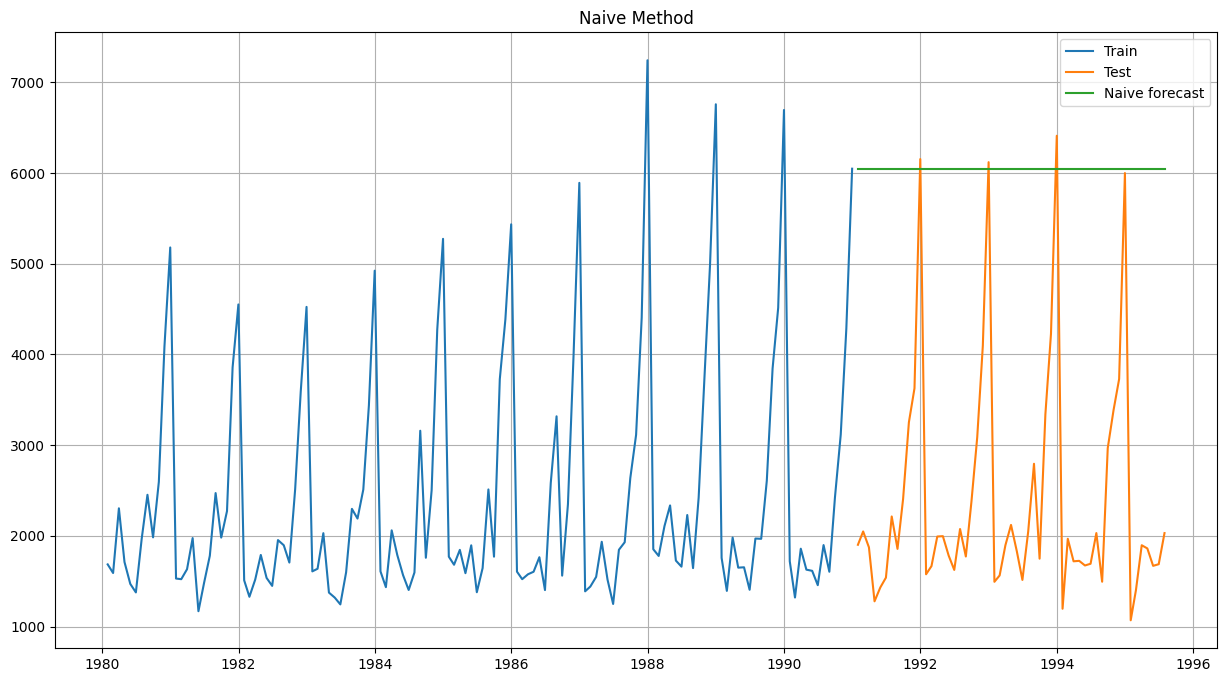

In [ ]:
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(train_df['Sparkling'], label='Train')
plt.plot(test_df['Sparkling'], label='Test')
plt.plot(naive_test_df['predict'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [ ]:
rmse = metrics.mean_squared_error(test_df['Sparkling'],naive_test_df['predict'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %.2f" %(rmse))

For Naive forecast on the Test Data,  RMSE is 3864.28


In [ ]:
results_naive = pd.DataFrame({'Test RMSE': [rmse]},index=['NaiveForecast'])
results_df = pd.concat([results_df,results_naive])
results_df

Test RMSE
Regresion On Time  1389.135175
NaiveForecast      3864.279352

In [ ]:
avg_test_df = test_df.copy()
avg_train_df = train_df.copy()
avg_train_df.tail()

Sparkling
Time_new             
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [ ]:
avg_train_df['Sparkling'].mean()

2403.780303030303

In [ ]:
avg_test_df['predict'] = avg_train_df['Sparkling'].mean()

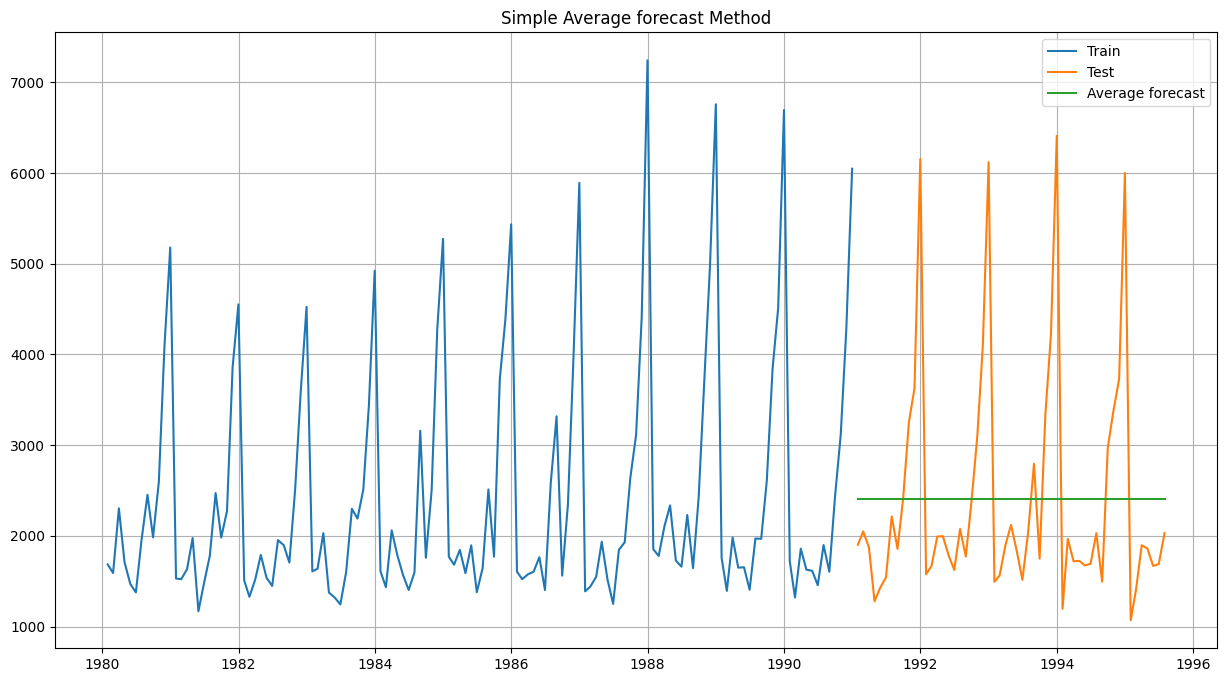

In [ ]:
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(train_df['Sparkling'], label='Train')
plt.plot(test_df['Sparkling'], label='Test')
plt.plot(avg_test_df['predict'], label='Average forecast')
plt.legend(loc='best')
plt.title('Simple Average forecast Method')
plt.show()

In [ ]:
rmse_avg = metrics.mean_squared_error(test_df['Sparkling'],avg_test_df['predict'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %.2f" %(rmse_avg))

For Simple Average forecast on the Test Data,  RMSE is 1275.08


In [ ]:
results_avg = pd.DataFrame({'Test RMSE': [rmse_avg]},index=['AverageForecast'])
results_df= pd.concat([results_df,results_avg])
results_df

Test RMSE
Regresion On Time  1389.135175
NaiveForecast      3864.279352
AverageForecast    1275.081804

In [ ]:
MovAvg_df = df.copy()
MovAvg_df.head()

Sparkling
Time_new             
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [ ]:
MovAvg_df['Trailing_2'] = MovAvg_df['Sparkling'].rolling(2).mean()
MovAvg_df['Trailing_4'] = MovAvg_df['Sparkling'].rolling(4).mean()
MovAvg_df['Trailing_6'] = MovAvg_df['Sparkling'].rolling(6).mean()
MovAvg_df['Trailing_9'] = MovAvg_df['Sparkling'].rolling(9).mean()
MovAvg_df.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_new                                                             
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

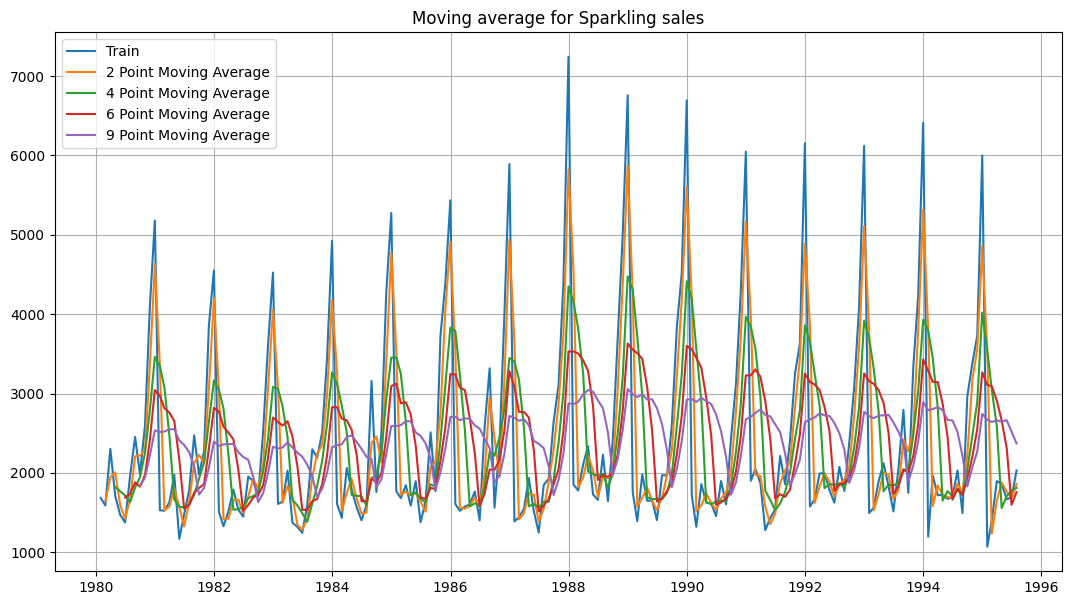

In [ ]:
plt.figure(figsize=(13,7))
plt.plot(MovAvg_df['Sparkling'], label='Train')
plt.plot(MovAvg_df['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovAvg_df['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovAvg_df['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovAvg_df['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.title("Moving average for Sparkling sales")
plt.grid();

In [ ]:
MA_train_df=MovAvg_df[MovAvg_df.index.year < 1991]
MA_test_df=MovAvg_df[MovAvg_df.index.year >= 1991]

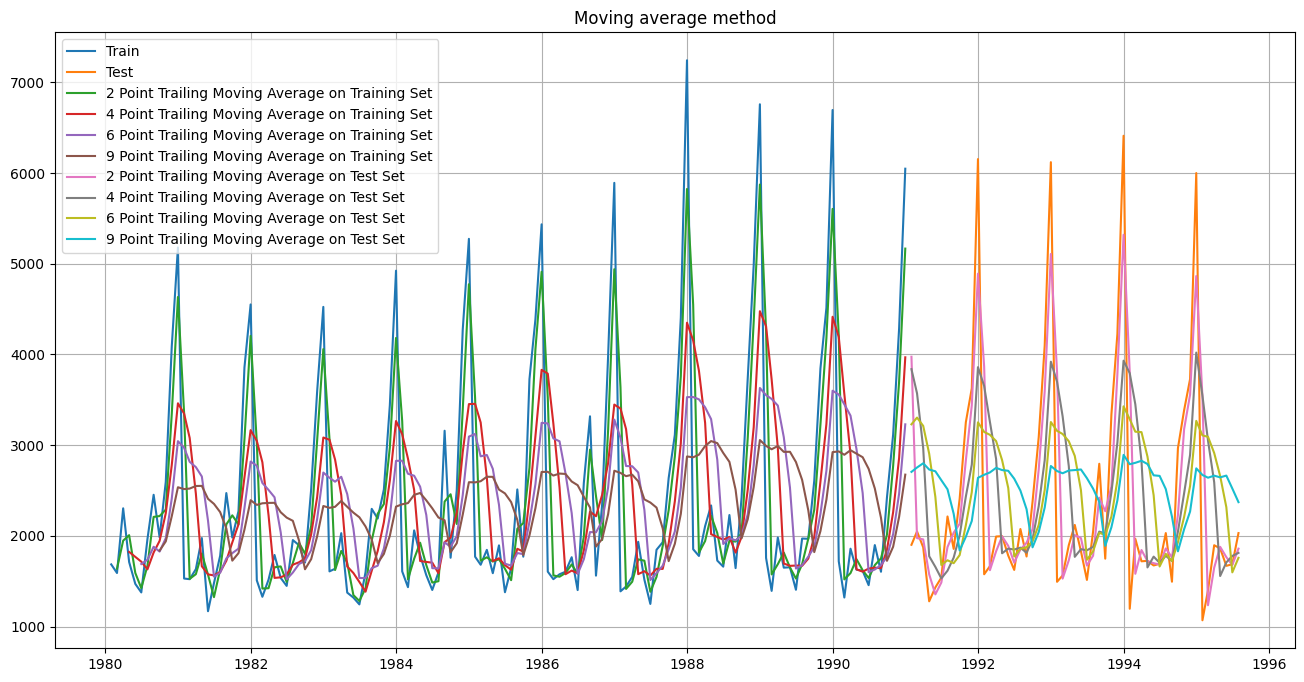

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(MA_train_df['Sparkling'], label='Train')
plt.plot(MA_test_df['Sparkling'], label='Test')

plt.plot(MA_train_df['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(MA_train_df['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(MA_train_df['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MA_train_df['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(MA_test_df['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MA_test_df['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MA_test_df['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MA_test_df['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title("Moving average method")
plt.legend(loc = 'best')
plt.grid();

In [ ]:
rmse_model2_test_2 = metrics.mean_squared_error(test_df['Sparkling'],MA_test_df['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %.2f" %(rmse_model2_test_2))


rmse_model2_test_4 = metrics.mean_squared_error(test_df['Sparkling'],MA_test_df['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %.2f" %(rmse_model2_test_4))


rmse_model2_test_6 = metrics.mean_squared_error(test_df['Sparkling'],MA_test_df['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %.2f" %(rmse_model2_test_6))


rmse_model2_test_9 = metrics.mean_squared_error(test_df['Sparkling'],MA_test_df['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %.2f " %(rmse_model2_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.40
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.59
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.93
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.28 


In [ ]:
results = pd.DataFrame({'Test RMSE': [rmse_model2_test_2,rmse_model2_test_4
                                          ,rmse_model2_test_6,rmse_model2_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results_df = pd.concat([results_df, results])
results_df

Test RMSE
Regresion On Time            1389.135175
NaiveForecast                3864.279352
AverageForecast              1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [ ]:
SES_train_df = train_df.copy()
SES_test_df= test_df.copy()

In [ ]:
model_SES_df = SimpleExpSmoothing(SES_train_df['Sparkling'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_SES_autofit_df = model_SES_df.fit(optimized=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
model_SES_autofit_df.params

{'smoothing_level': 0.04960659880745982,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
SES_test_df['predict'] = model_SES_autofit_df.forecast(steps=len(test_df))
SES_test_df.head()

Sparkling      predict
Time_new                          
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339

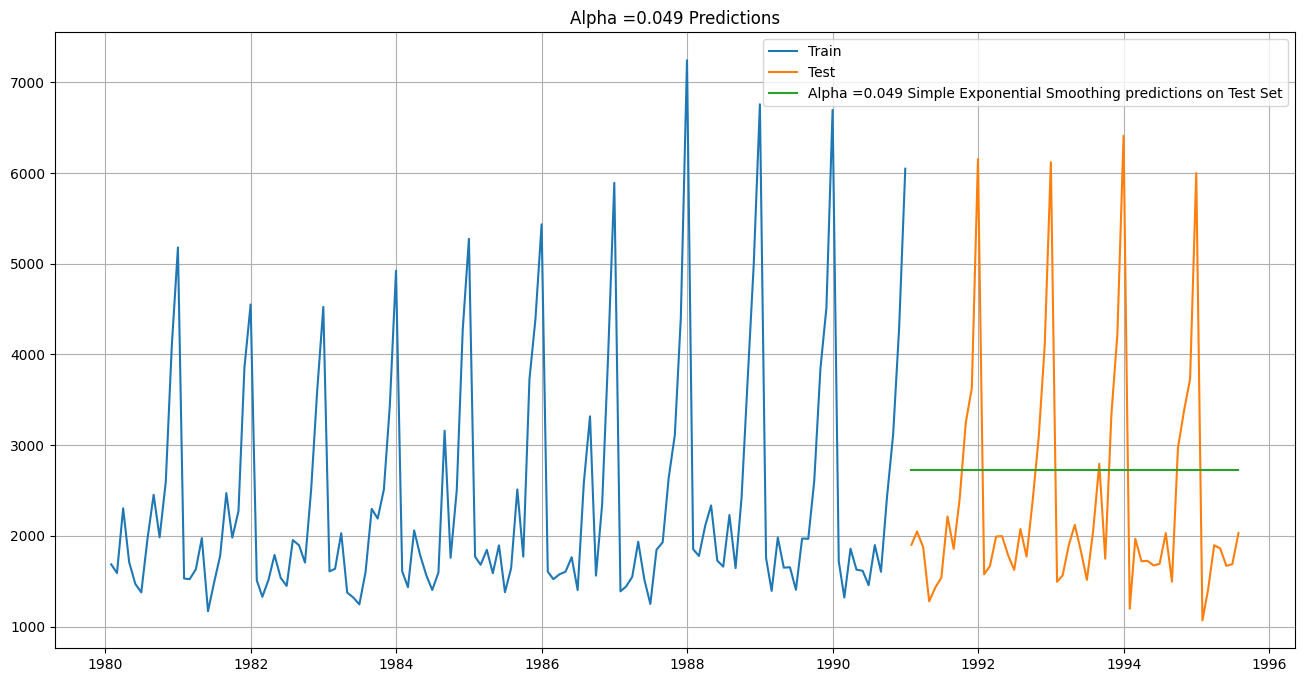

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(SES_train_df['Sparkling'], label='Train')
plt.plot(SES_test_df['Sparkling'], label='Test')
plt.plot(SES_test_df['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049 Predictions');

In [ ]:
rmse_model3_test_1 = metrics.mean_squared_error(SES_test_df['Sparkling'],SES_test_df['predict'],squared=False)
print("For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %.2f" %(rmse_model3_test_1))

For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.03


In [ ]:
results3_df= pd.DataFrame({'Test RMSE': [rmse_model3_test_1]}, index=['Alpha=0.049,SimpleExponentialSmoothing'])
results_df = pd.concat([results_df, results3_df])
results_df

Test RMSE
Regresion On Time                       1389.135175
NaiveForecast                           3864.279352
AverageForecast                         1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
6pointTrailingMovingAverage             1283.927428
9pointTrailingMovingAverage             1346.278315
Alpha=0.049,SimpleExponentialSmoothing  1316.034674

In [ ]:
resultsDf = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES_df.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_df['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_df['predict',i] = model_SES_alpha_i.forecast(steps=55)
    rmse_model5_test_i = metrics.mean_squared_error(SES_test_df['Sparkling'],SES_test_df['predict',i],squared=False)
    resultsDf = resultsDf.append({'Alpha Values':i,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

<ipython-input-174-abe520b6169d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf = resultsDf.append({'Alpha Values':i,'Test RMSE':rmse_model5_test_i}, ignore_index=True)
<ipython-input-174-abe520b6169d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf = resultsDf.append({'Alpha Values':i,'Test RMSE':rmse_model5_test_i}, ignore_index=True)
<ipython-input-174-abe520b6169d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf = resultsDf.append({'Alpha Values':i,'Test RMSE':rmse_model5_test_i}, ignore_index=True)
<ipython-input-174-abe520b6169d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf = results

In [ ]:
resultsDf.sort_values(by='Test RMSE', ascending=True)

Alpha Values    Test RMSE
0           0.3  1935.507132
1           0.4  2311.919615
2           0.5  2666.351413
3           0.6  2979.204388
4           0.7  3249.944092
5           0.8  3483.801006
6           0.9  3686.794285

In [ ]:
results__4 = pd.DataFrame({'Test RMSE': [resultsDf.sort_values(by='Test RMSE', ascending=True).values[0][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

results_df = pd.concat([results_df, results__4])
results_df

Test RMSE
Regresion On Time                       1389.135175
NaiveForecast                           3864.279352
AverageForecast                         1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
6pointTrailingMovingAverage             1283.927428
9pointTrailingMovingAverage             1346.278315
Alpha=0.049,SimpleExponentialSmoothing  1316.034674
Alpha=0.3,SimpleExponentialSmoothing    1935.507132

In [ ]:
DES_train_df = train_df.copy()
DES_test_df = test_df.copy()

In [ ]:
model_DES_df = Holt(DES_train_df['Sparkling'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_DES_autofit_df = model_DES_df.fit(optimized=True)
model_DES_autofit_df.params

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
DES_test_df['predict'] = model_DES_autofit_df.forecast(steps=len(test_df))
rmse_model3_test_2 = metrics.mean_squared_error(DES_test_df['Sparkling'],DES_test_df['predict'],squared=False)
print("For Alpha = 0.68 and Beta = 9.9e-05 \nDouble Exponential Smoothing Model forecast on the Test Data, RMSE is %.2f" %(rmse_model3_test_2))

For Alpha = 0.68 and Beta = 9.9e-05 
Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.24


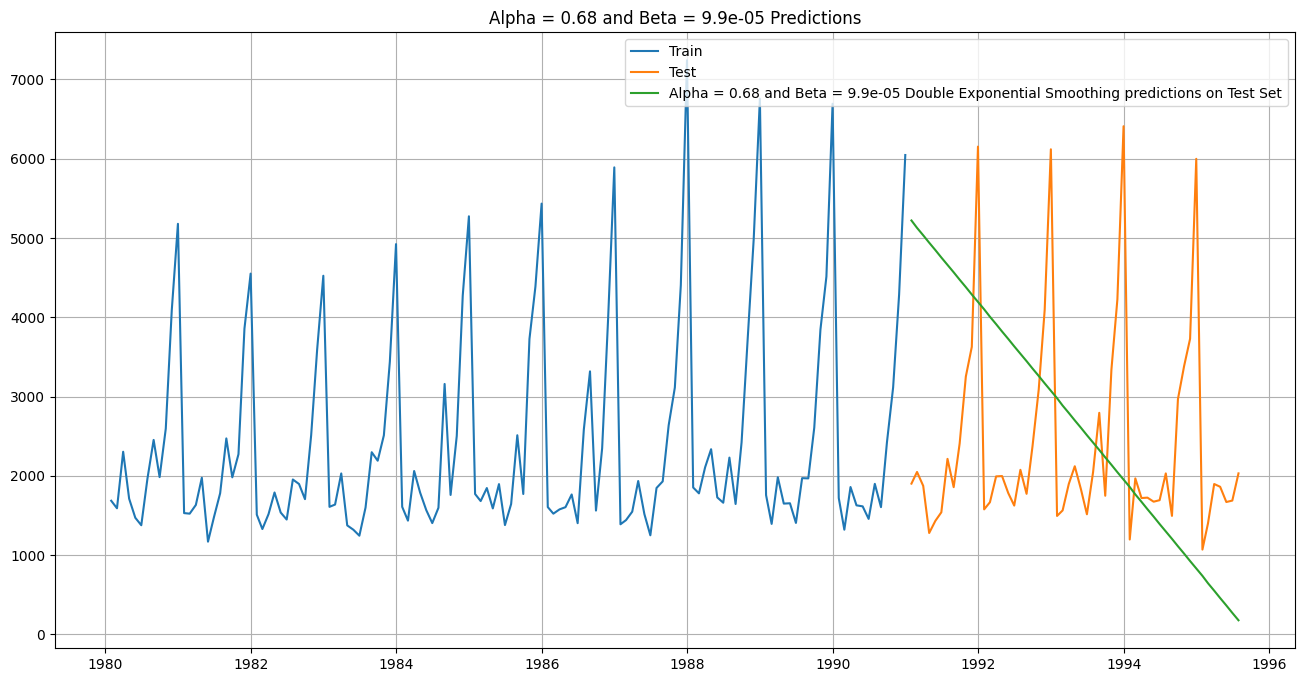

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(DES_train_df['Sparkling'], label='Train')
plt.plot(DES_test_df['Sparkling'], label='Test')
plt.plot(DES_test_df['predict'], label='Alpha = 0.68 and Beta = 9.9e-05 Double Exponential Smoothing predictions on Test Set')
plt.legend(loc='upper right')
plt.grid()
plt.title('Alpha = 0.68 and Beta = 9.9e-05 Predictions');

In [ ]:
results__6 = pd.DataFrame({'Test RMSE': [rmse_model3_test_2]}
                           ,index=['Alpha=0.68,Beta=9.9e-05,DoubleExponentialSmoothing'])

results_df = pd.concat([results_df, results__6])
results_df

Test RMSE
Regresion On Time                                   1389.135175
NaiveForecast                                       3864.279352
AverageForecast                                     1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.049,SimpleExponentialSmoothing              1316.034674
Alpha=0.3,SimpleExponentialSmoothing                1935.507132
Alpha=0.68,Beta=9.9e-05,DoubleExponentialSmoothing  2007.238526

In [ ]:
results__5 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
results__5

Empty DataFrame
Columns: [Alpha Values, Beta Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES_df.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_df['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_df['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        rmse_model6_test = metrics.mean_squared_error(DES_test_df['Sparkling'],DES_test_df['predict',i,j],squared=False)
        results__5 = results__5.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test}, ignore_index=True)

<ipython-input-184-7163d94d4d4e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results__5 = results__5.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test}, ignore_index=True)
<ipython-input-184-7163d94d4d4e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results__5 = results__5.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test}, ignore_index=True)
<ipython-input-184-7163d94d4d4e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results__5 = results__5.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test}, ignore_index=True)
<ipython-input-184-7163d94d4d4e>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

In [ ]:
results__5.sort_values(by=['Test RMSE'], ascending=True).head()

Alpha Values  Beta Values     Test RMSE
0            0.3          0.3  18259.110704
8            0.4          0.3  23878.496940
1            0.3          0.4  26069.841401
16           0.5          0.3  27095.532414
24           0.6          0.3  29070.722592

In [ ]:
results__6 = pd.DataFrame({'Test RMSE': [results__5.sort_values(by=['Test RMSE'], ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

results_df = pd.concat([results_df, results__6])
results_df

Test RMSE
Regresion On Time                                    1389.135175
NaiveForecast                                        3864.279352
AverageForecast                                      1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049,SimpleExponentialSmoothing               1316.034674
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.68,Beta=9.9e-05,DoubleExponentialSmoothing   2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

In [ ]:
TES_train_df = train_df.copy()
TES_test_df = test_df.copy()

In [ ]:
model_TES_df = ExponentialSmoothing(TES_train_df['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [ ]:
model_TES_autofit_df = model_TES_df.fit()

In [ ]:
TES_test_df['auto_predict'] = model_TES_autofit_df.forecast(steps=len(test_df))
TES_test_df.head()

Sparkling  auto_predict
Time_new                           
1991-01-31       1902   1587.685845
1991-02-28       2049   1356.590237
1991-03-31       1874   1763.121866
1991-04-30       1279   1656.379813
1991-05-31       1432   1542.186697

In [ ]:
model_TES_autofit_df.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

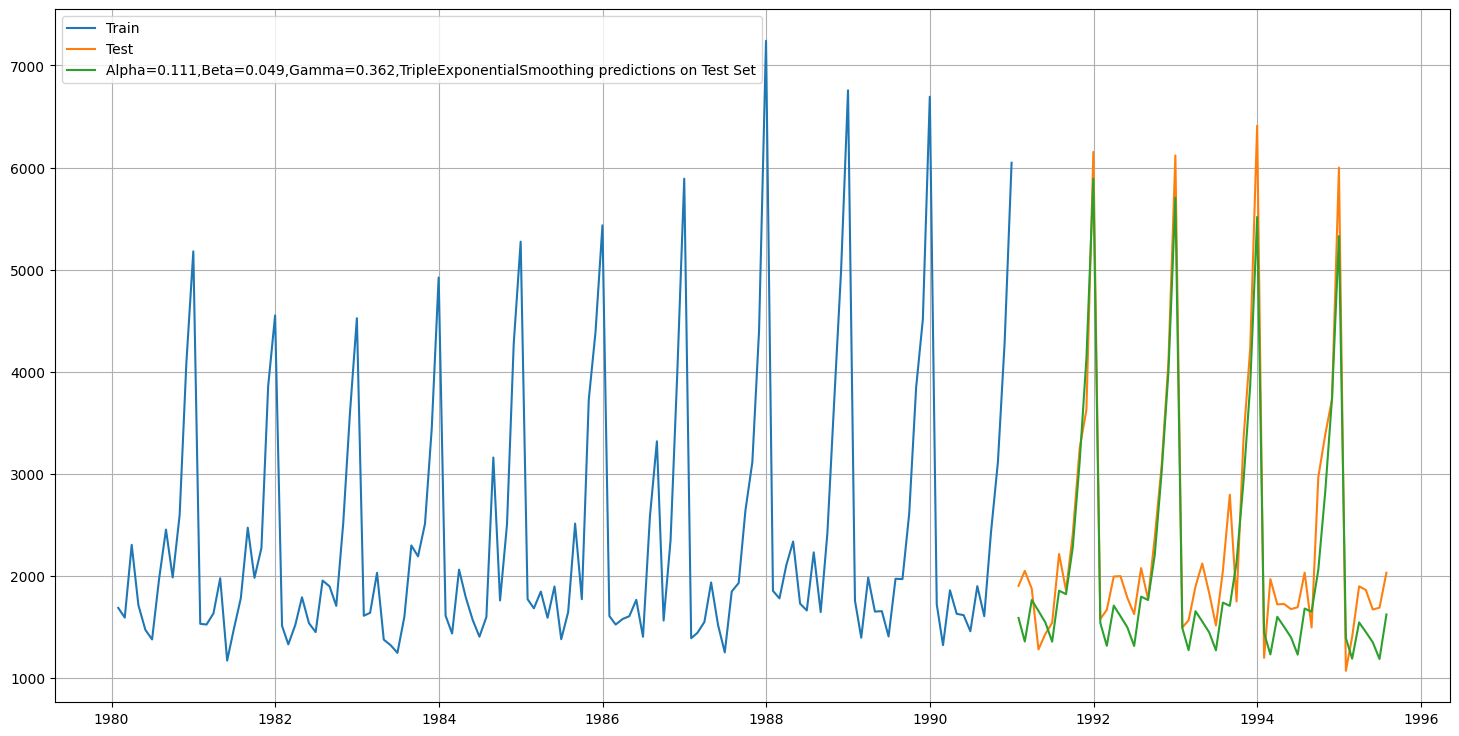

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(TES_train_df['Sparkling'], label='Train')
plt.plot(TES_test_df['Sparkling'], label='Test')

plt.plot(TES_test_df['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [ ]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test_df['Sparkling'],TES_test_df['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %.2f"
      %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 403.71


In [ ]:
results__7 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.363,TripleExponentialSmoothing'])

results_df = pd.concat([results_df, results__7])
results_df

Test RMSE
Regresion On Time                                    1389.135175
NaiveForecast                                        3864.279352
AverageForecast                                      1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049,SimpleExponentialSmoothing               1316.034674
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.68,Beta=9.9e-05,DoubleExponentialSmoothing   2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.111,Beta=0.049,Gamma=0.363,TripleExpone...    403.706228

In [ ]:
results__8 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
results__8

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_df.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_df['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_df['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
            rmse_model8_test = metrics.mean_squared_error(TES_test_df['Sparkling'],TES_test_df['predict',i,j,k],squared=False)

            results__8 = results__8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

<ipython-input-196-59d680577a70>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results__8 = results__8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_model8_test}
<ipython-input-196-59d680577a70>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results__8 = results__8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_model8_test}
<ipython-input-196-59d680577a70>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results__8 = results__8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_model8_test}
<ipython-input-196-59d680577a70>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

In [ ]:
results__8.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values   Test RMSE
0             0.3          0.3           0.3  361.397300
17            0.3          0.5           0.4  512.542557
376           0.8          1.0           0.3  580.266110
66            0.4          0.3           0.5  592.153132
8             0.3          0.4           0.3  605.110479

In [ ]:
model_0= model_TES_df.fit(smoothing_level=0.3,smoothing_trend=0.3,smoothing_seasonal=0.3,optimized=False,use_brute=True)
TES_train_df['predict'] = model_0.fittedvalues
TES_test_df['predict'] = model_0.forecast(steps=55)

<ipython-input-198-b19a30278de0>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_df['predict'] = model_0.fittedvalues
<ipython-input-198-b19a30278de0>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_df['predict'] = model_0.forecast(steps=55)


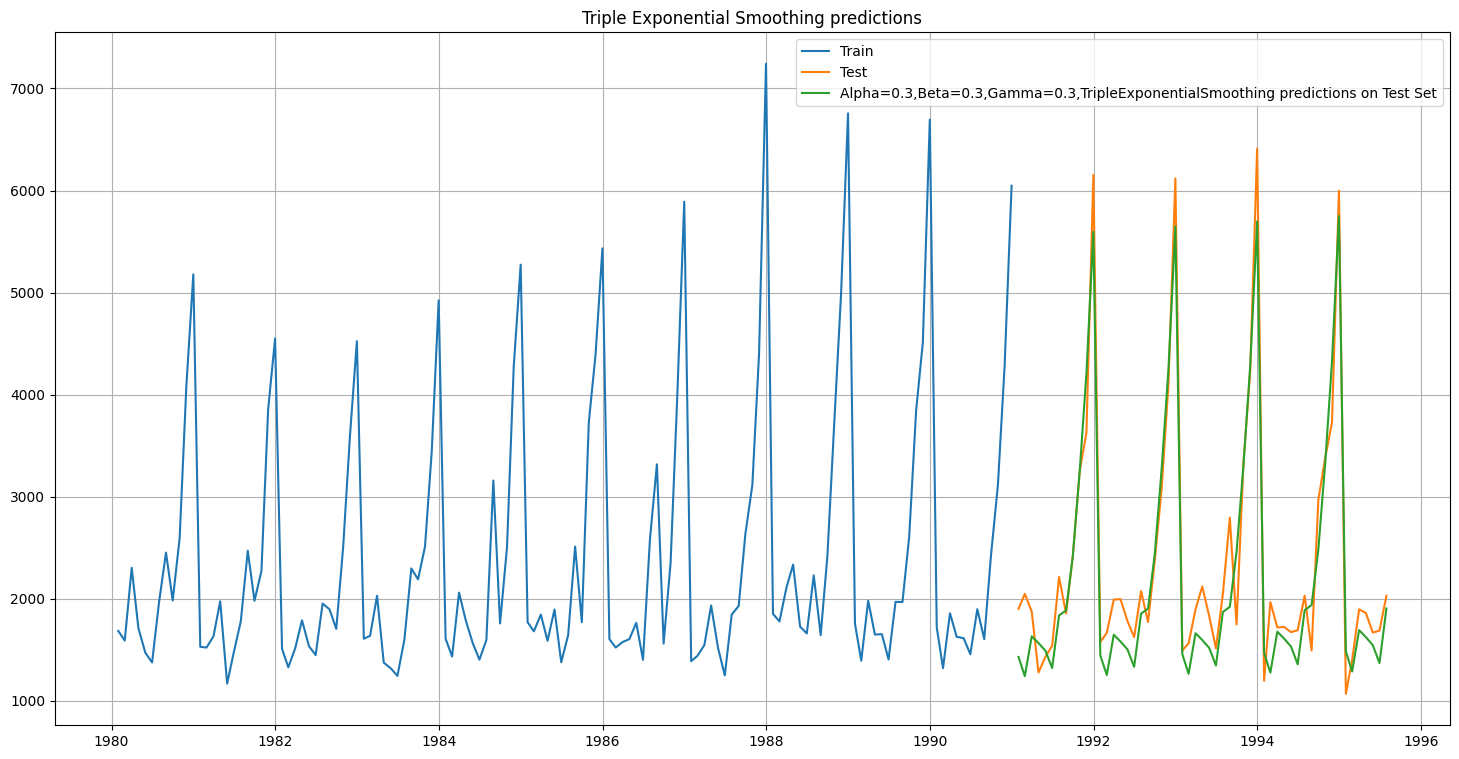

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(TES_train_df['Sparkling'], label='Train')
plt.plot(TES_test_df['Sparkling'], label='Test')
plt.plot(TES_test_df['predict'], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing predictions")
plt.grid();

In [ ]:
results__9 = pd.DataFrame({'Test RMSE': [results__8.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

results_df = pd.concat([results_df, results__9])
results_df

Test RMSE
Regresion On Time                                    1389.135175
NaiveForecast                                        3864.279352
AverageForecast                                      1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049,SimpleExponentialSmoothing               1316.034674
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.68,Beta=9.9e-05,DoubleExponentialSmoothing   2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.111,Beta=0.049,Gamma=0.363,TripleExpone...    403.706228
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    361.397300

In [ ]:
print('Sorted by RMSE values on the Test Data for Sparkling sales:','\n',)
results_df.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data for Sparkling sales: 



Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    361.397300
Alpha=0.111,Beta=0.049,Gamma=0.363,TripleExpone...    403.706228
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
AverageForecast                                      1275.081804
6pointTrailingMovingAverage                          1283.927428
Alpha=0.049,SimpleExponentialSmoothing               1316.034674
9pointTrailingMovingAverage                          1346.278315
Regresion On Time                                    1389.135175
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.68,Beta=9.9e-05,DoubleExponentialSmoothing   2007.238526
NaiveForecast                                        3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

For this data, we had both trend and seasonality so Triple Exponential Smoothing works better than the Simple Exponential Smoothing and Double Exponential Smoothing.

Hence the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.3,  𝛽  = 0.3 and  𝛾  = 0.3.


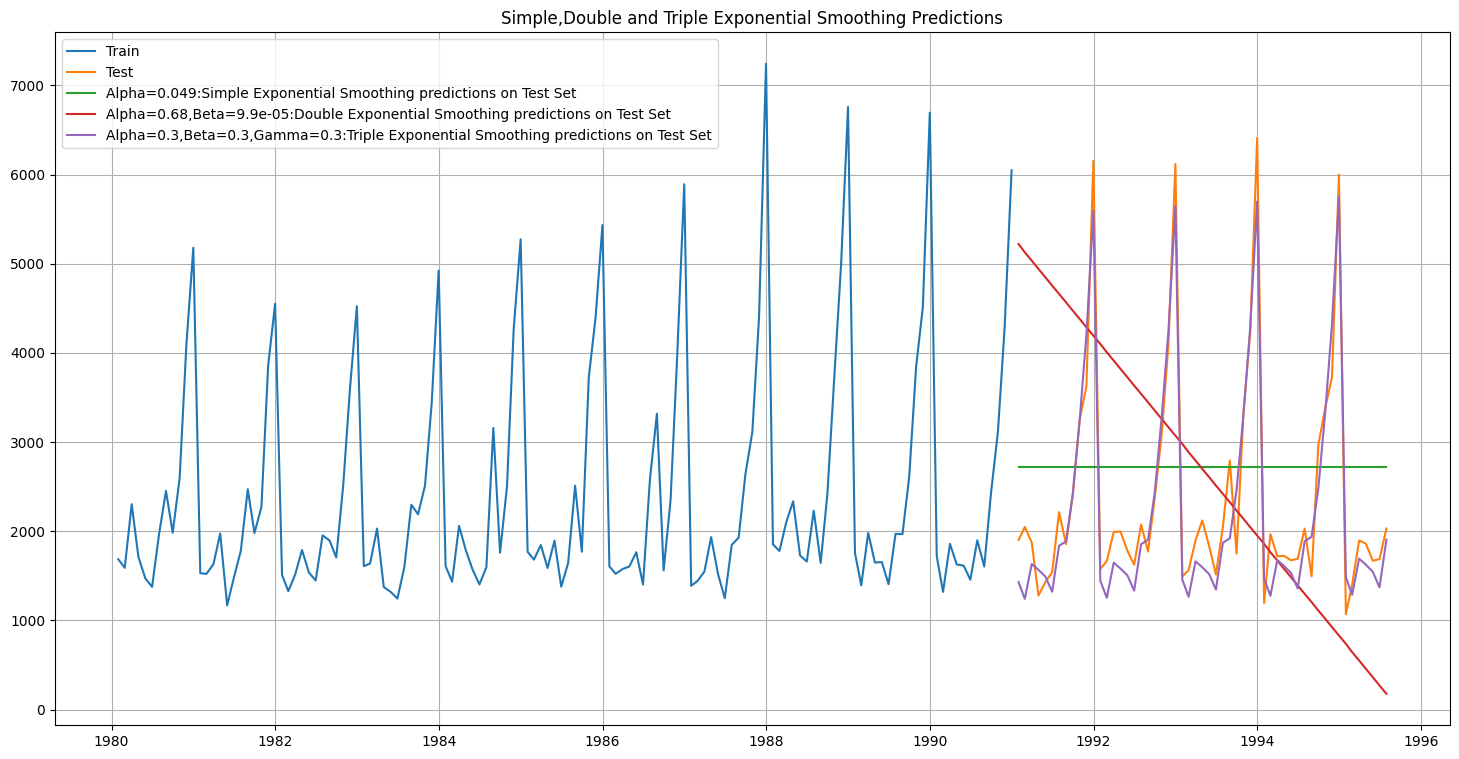

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='Test')

plt.plot(SES_test_df['predict'], label='Alpha=0.049:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test_df['predict'], label='Alpha=0.68,Beta=9.9e-05:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test_df['predict'], label='Alpha=0.3,Beta=0.3,Gamma=0.3:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');


In [ ]:
from statsmodels.tsa.stattools import adfuller

Dickey-Fuller Test - Dicky Fuller Test on the timeseries is run to check for stationarity of data.

Null Hypothesis  𝐻0 : Time Series is non-stationary.
Alternate Hypothesis  𝑯𝒂 : Time Series is stationary.


So if p-value < 0.05 then null hypothesis(Time series is non-stationary) is rejected else the Time series is non-stationary is failed to be rejected .

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

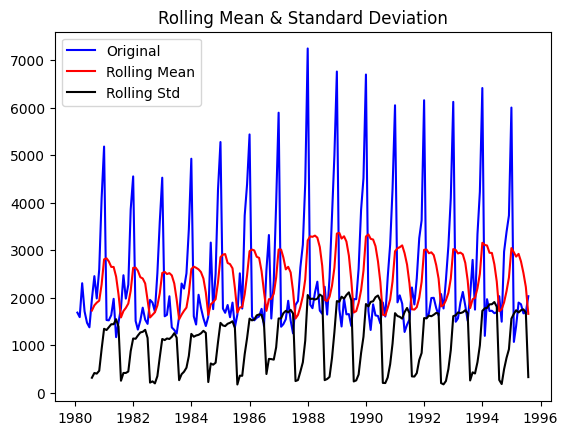

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [ ]:
test_stationarity(df['Sparkling'])

Since the p-value is 0.601 at 5% critical value, which is greater than 0.05, the null hypothesis is not rejected. Hence the time series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

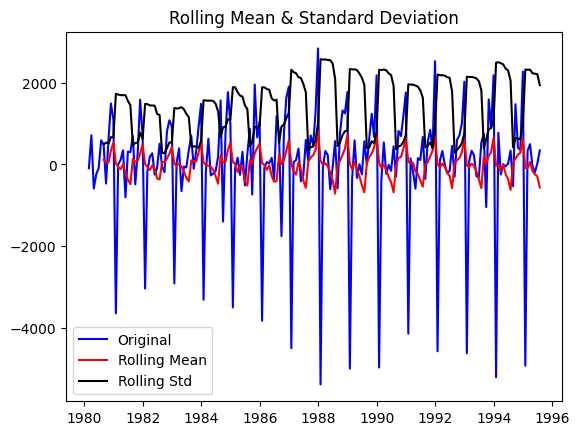

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [ ]:
test_stationarity(df['Sparkling'].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is  stationary.

###1.ARIMA model

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model are:')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model are:
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
ARIMA_AIC_df = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_df

Empty DataFrame
Columns: [param, AIC]
Index: []

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
for param in pdq:
    ARIMA_model_df = ARIMA(train_df['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_df.aic))
    ARIMA_AIC_df = ARIMA_AIC_df.append({'param':param, 'AIC': ARIMA_model_df.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.4083231352784
ARIMA(1, 1, 0) - AIC:2266.6085393190097


<ipython-input-209-5944b07095ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df = ARIMA_AIC_df.append({'param':param, 'AIC': ARIMA_model_df.aic}, ignore_index=True)
<ipython-input-209-5944b07095ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df = ARIMA_AIC_df.append({'param':param, 'AIC': ARIMA_model_df.aic}, ignore_index=True)
<ipython-input-209-5944b07095ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df = ARIMA_AIC_df.append({'param':param, 'AIC': ARIMA_model_df.aic}, ignore_index=True)
<ipython-input-209-5944b07095ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df = ARIMA_A

ARIMA(1, 1, 1) - AIC:2235.755094674255
ARIMA(1, 1, 2) - AIC:2234.5272004518056
ARIMA(2, 1, 0) - AIC:2260.36574396809


<ipython-input-209-5944b07095ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df = ARIMA_AIC_df.append({'param':param, 'AIC': ARIMA_model_df.aic}, ignore_index=True)
<ipython-input-209-5944b07095ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df = ARIMA_AIC_df.append({'param':param, 'AIC': ARIMA_model_df.aic}, ignore_index=True)
<ipython-input-209-5944b07095ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df = ARIMA_AIC_df.append({'param':param, 'AIC': ARIMA_model_df.aic}, ignore_index=True)


ARIMA(2, 1, 1) - AIC:2233.777626238336


<ipython-input-209-5944b07095ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df = ARIMA_AIC_df.append({'param':param, 'AIC': ARIMA_model_df.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:2213.5092125741553


<ipython-input-209-5944b07095ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df = ARIMA_AIC_df.append({'param':param, 'AIC': ARIMA_model_df.aic}, ignore_index=True)


In [ ]:
ARIMA_AIC_df.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509213
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [ ]:
auto_ARIMA_df = ARIMA(train_df['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA_df = auto_ARIMA_df.fit()

print(results_auto_ARIMA_df.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 11 Jun 2023   AIC                           2213.509
Time:                        05:41:40   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

In [ ]:
predicted_auto_ARIMA_df = results_auto_ARIMA_df.forecast(steps=len(test_df))

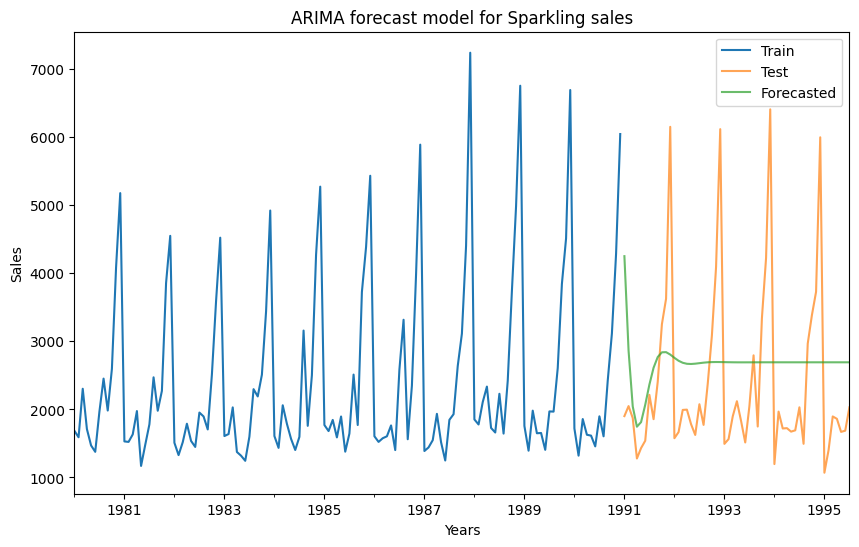

In [ ]:
axis = train_df['Sparkling'].plot(label='Train', figsize=(10, 6))
test_df['Sparkling'].plot(ax=axis, label='Test', alpha=0.7)
predicted_auto_ARIMA_df.plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("ARIMA forecast model for Sparkling sales")
plt.show()
plt.close()

<Figure size 1200x700 with 0 Axes>

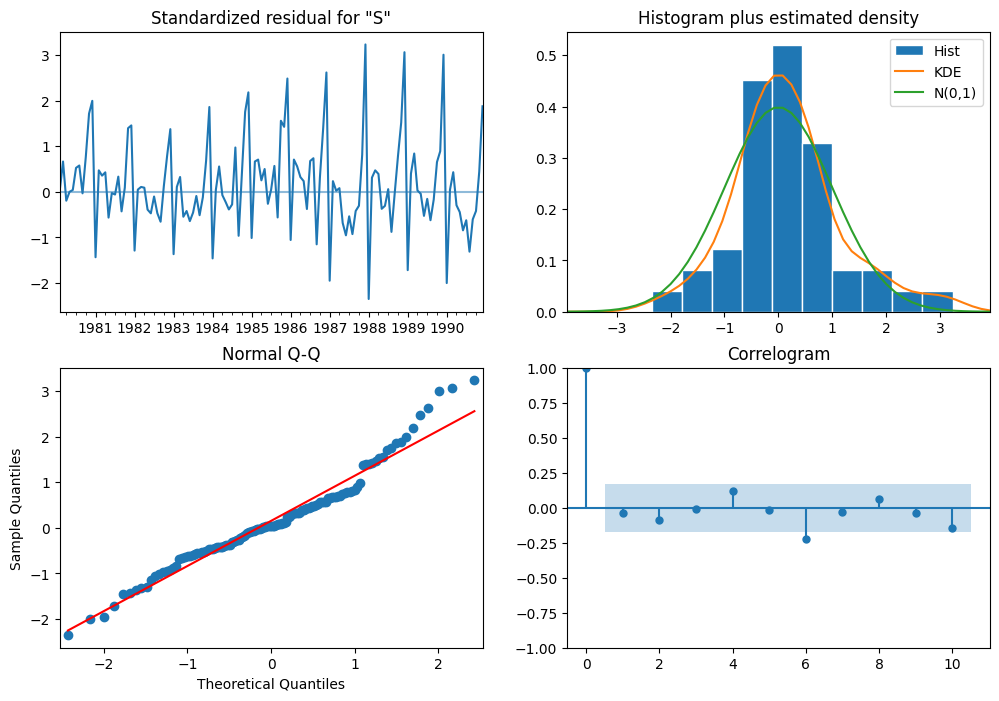

In [ ]:
plt.figure(figsize=(12,7))
results_auto_ARIMA_df.plot_diagnostics(figsize=(12,8))
plt.show()

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse_arima = mean_squared_error(test_df['Sparkling'],predicted_auto_ARIMA_df,squared=False)
print(rmse_arima)

1299.9797494286825


In [ ]:
results__10 = pd.DataFrame({'Test RMSE': [rmse_arima]}
                           ,index=['ARIMA(2,1,2)'])


results_df= pd.concat([results_df,results__10])
results_df

Test RMSE
Regresion On Time                                    1389.135175
NaiveForecast                                        3864.279352
AverageForecast                                      1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049,SimpleExponentialSmoothing               1316.034674
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.68,Beta=9.9e-05,DoubleExponentialSmoothing   2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.111,Beta=0.049,Gamma=0.363,TripleExpone...    403.706228
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    361.397300
ARIMA(2,1,2)                                         1299.979749

###2.SARIMA model

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model are:')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model are:
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [ ]:
SARIMA_AIC_df = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_df

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_df = sm.tsa.statespace.SARIMAX(train_df['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA_df = SARIMA_model_df.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_df.aic))
        SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844573


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023447
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530138882


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791837
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158613616


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920804
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566603


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572783755
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183827


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193744662


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144550118


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417545


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085437517


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018823125118
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687213
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.91280072004


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890551836
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332300617


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675071384861


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068255703


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774532562


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438838382508


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215626972148
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339903289


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.268847635434
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279330658
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.534359458687


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402580412


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128674


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132615317


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067521577
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.9340491545618
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.355897412228


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352607707


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.142446652882


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.5449249296978


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863526987


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.616160687459


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3140614241731


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069984366607
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.463345050468


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307502326


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421748363


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259802510556


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.987186015647


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.584247263976


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4227861526329


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5115793263108


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9345629223185
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.438343541249


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039813517
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066057523


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.935734897795


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204253579


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464863646


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.634498730537


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191732205206
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.8586131456577


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209494944486


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.42340803265


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234289808818


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911247192607


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888282652937


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506121814


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595850570527


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428632512016
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681147132393


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)
<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.237262743659


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523433365638


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931131357


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086053156514


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404038114372


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.045591329368


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476009026572


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1560.469447348402


<ipython-input-219-4ada52bb54b0>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df= SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df.aic}, ignore_index=True)


In [ ]:
SARIMA_AIC_df.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340404

In [ ]:
import statsmodels.api as sm

auto_SARIMA_df= sm.tsa.statespace.SARIMAX(train_df['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_df = auto_SARIMA_df.fit(maxiter=1000)
print(results_auto_SARIMA_df.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 11 Jun 2023   AIC                           1555.584
Time:                                    05:42:27   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.464      0.014      -1.128      -0.128
ma.L1         -0.1040      0.225   

<Figure size 1200x800 with 0 Axes>

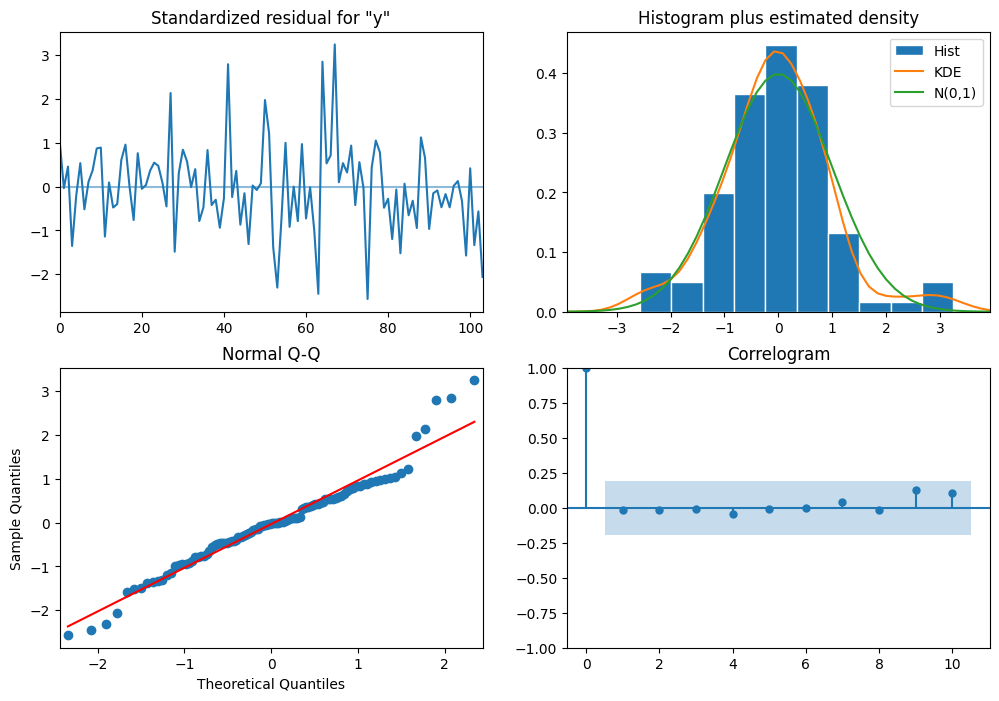

In [ ]:
plt.figure(figsize=(12,8))
results_auto_SARIMA_df.plot_diagnostics(figsize=(12,8))
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

In [ ]:
predicted_auto_SARIMA_df = results_auto_SARIMA_df.get_forecast(steps=len(test_df))

In [ ]:
pred = results_auto_SARIMA_df.get_forecast(steps=len(test_df), alpha=0.05)

In [ ]:
predicted_auto_SARIMA_df.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.325736  388.341704     566.189983    2088.461489
1  1315.072585  402.007683     527.152005    2102.993164
2  1621.527819  402.001296     833.619758    2409.435880
3  1598.823447  407.240881     800.645987    2397.000907
4  1392.635677  407.971310     593.026602    2192.244752

In [ ]:
testc= test_df.copy()

In [ ]:
testc['forecasted'] = pred.predicted_mean

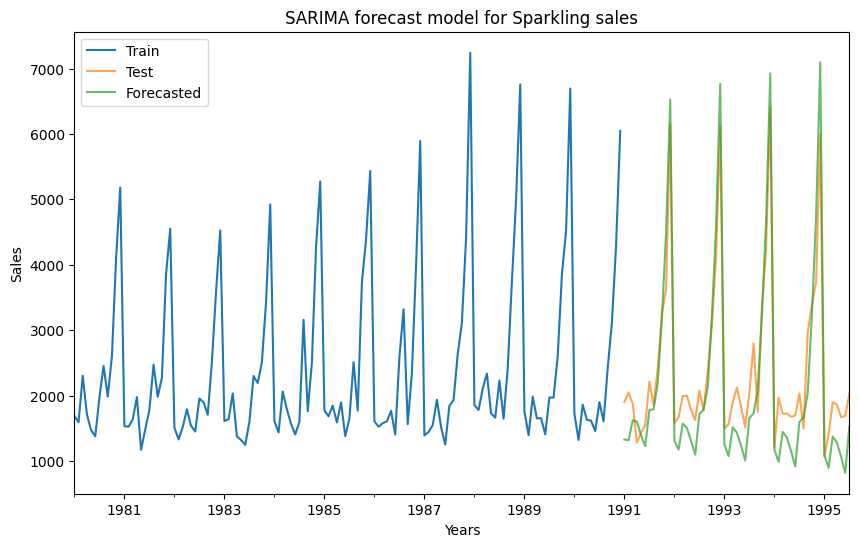

In [ ]:
axis = train_df['Sparkling'].plot(label='Train', figsize=(10, 6))
testc['Sparkling'].plot(ax=axis, label='Test', alpha=0.7)
testc['forecasted'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("SARIMA forecast model for Sparkling sales")
plt.show()
plt.close()

In [ ]:
rmse_sarima = mean_squared_error(test_df['Sparkling'],predicted_auto_SARIMA_df.predicted_mean,squared=False)
print(rmse_sarima)

528.6593092642535


In [ ]:
results_sarima = pd.DataFrame({'Test RMSE': [rmse_sarima]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])

results_df = pd.concat([results_df,results_sarima])

results_df

Test RMSE
Regresion On Time                                    1389.135175
NaiveForecast                                        3864.279352
AverageForecast                                      1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049,SimpleExponentialSmoothing               1316.034674
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.68,Beta=9.9e-05,DoubleExponentialSmoothing   2007.238526
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.111,Beta=0.049,Gamma=0.363,TripleExpone...    403.706228
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    361.397300
ARIMA(2,1,2)                                         1299.979749
SARIMA(1,1,2)(1,0,2,12)                               528.659309

7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
results_df.sort_values(by='Test RMSE', ascending=True)

Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    361.397300
Alpha=0.111,Beta=0.049,Gamma=0.363,TripleExpone...    403.706228
SARIMA(1,1,2)(1,0,2,12)                               528.659309
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
AverageForecast                                      1275.081804
6pointTrailingMovingAverage                          1283.927428
ARIMA(2,1,2)                                         1299.979749
Alpha=0.049,SimpleExponentialSmoothing               1316.034674
9pointTrailingMovingAverage                          1346.278315
Regresion On Time                                    1389.135175
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.68,Beta=9.9e-05,DoubleExponentialSmoothing   2007.238526
NaiveForecast                                        3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

###1.TES - alpha = 0.3, beta = 0.3, gamma = 0.3 forecast

In [ ]:
fullmodel = ExponentialSmoothing(df,trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.3)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
RMSE_fullmodel = metrics.mean_squared_error(df['Sparkling'],fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 421.95574115600607


In [ ]:
prediction1 = fullmodel.forecast(steps=12)

In [ ]:
prediction1

1995-08-31    1855.825254
1995-09-30    2487.392425
1995-10-31    3323.826473
1995-11-30    4225.778223
1995-12-31    6828.439792
1996-01-31    1584.373605
1996-02-29    2060.523030
1996-03-31    2416.983167
1996-04-30    2389.425277
1996-05-31    2156.979109
1996-06-30    2036.459036
1996-07-31    2423.757719
Freq: M, dtype: float64

In [ ]:
prediction1.describe()

count      12.000000
mean     2815.813592
std      1445.985968
min      1584.373605
25%      2054.507031
50%      2403.204222
75%      2696.500937
max      6828.439792
dtype: float64

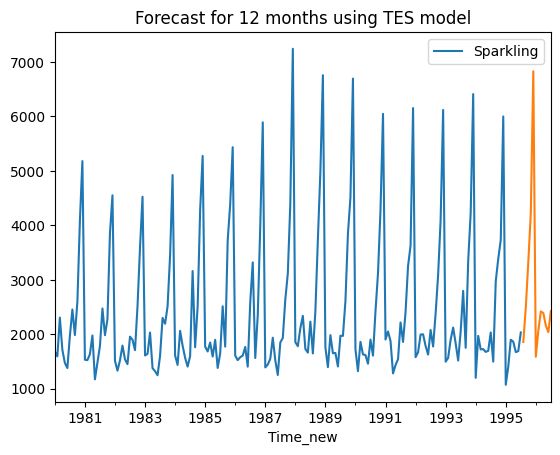

In [ ]:
df.plot()
prediction1.plot()
plt.title("Forecast for 12 months using TES model")
plt.show()

In [ ]:
pred_1_df = pd.DataFrame({'lower_CI':prediction1 - 1.96*np.std(fullmodel.resid,ddof=1),
                          'prediction':prediction1,
                          'upper_ci': prediction1+ 1.96*np.std(fullmodel.resid,ddof=1)})
pred_1_df.head(12)

lower_CI   prediction     upper_ci
1995-08-31  1026.573583  1855.825254  2685.076925
1995-09-30  1658.140754  2487.392425  3316.644096
1995-10-31  2494.574802  3323.826473  4153.078144
1995-11-30  3396.526551  4225.778223  5055.029894
1995-12-31  5999.188121  6828.439792  7657.691463
1996-01-31   755.121934  1584.373605  2413.625276
1996-02-29  1231.271358  2060.523030  2889.774701
1996-03-31  1587.731496  2416.983167  3246.234839
1996-04-30  1560.173606  2389.425277  3218.676948
1996-05-31  1327.727438  2156.979109  2986.230780
1996-06-30  1207.207365  2036.459036  2865.710707
1996-07-31  1594.506048  2423.757719  3253.009390

In [ ]:
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1026.573583  1855.825254  2685.076925
1995-09-30  1658.140754  2487.392425  3316.644096
1995-10-31  2494.574802  3323.826473  4153.078144
1995-11-30  3396.526551  4225.778223  5055.029894
1995-12-31  5999.188121  6828.439792  7657.691463

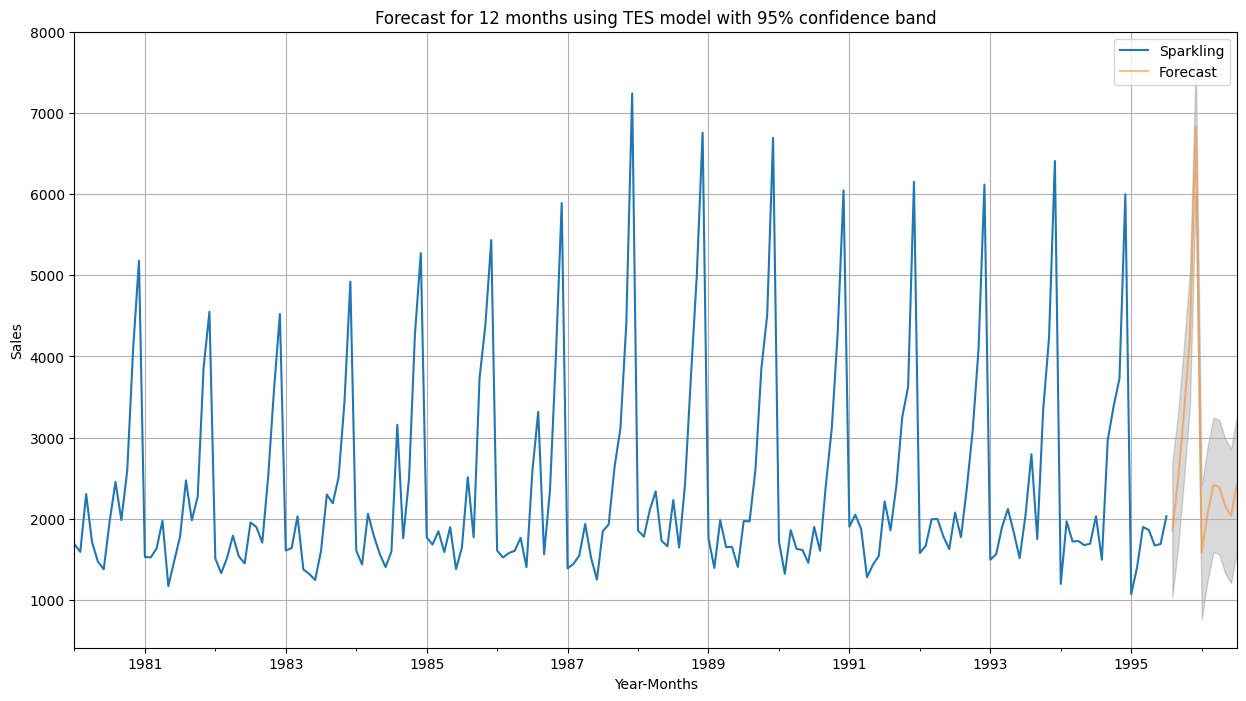

In [ ]:
axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.title("Forecast for 12 months using TES model with 95% confidence band")
plt.show()

###2.TES -  Alpha=0.111,Beta=0.049,Gamma=0.363,TripleExponentialSmoothing

In [ ]:
fullmodel1 = ExponentialSmoothing(df,trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.111,
                                                                 smoothing_trend=0.049,
                                                                 smoothing_seasonal=0.363)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 351.41368560871393


In [ ]:
prediction2 = fullmodel1.forecast(steps=12)

In [ ]:
prediction2

1995-08-31    1875.730674
1995-09-30    2395.244770
1995-10-31    3169.638751
1995-11-30    3828.735745
1995-12-31    5942.272565
1996-01-31    1279.976937
1996-02-29    1598.106274
1996-03-31    1837.084571
1996-04-30    1810.374488
1996-05-31    1652.723992
1996-06-30    1586.064979
1996-07-31    1956.087937
Freq: M, dtype: float64

In [ ]:
prediction2.describe()

count      12.000000
mean     2411.003474
std      1329.208219
min      1279.976937
25%      1639.069563
50%      1856.407623
75%      2588.843265
max      5942.272565
dtype: float64

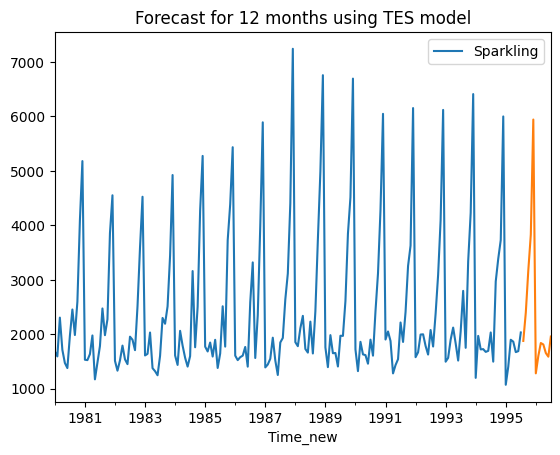

In [ ]:
df.plot()
prediction2.plot()
plt.title("Forecast for 12 months using TES model")
plt.show()

In [ ]:
pred_2_df = pd.DataFrame({'lower_CI':prediction2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction2,
                          'upper_ci': prediction2+ 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df.head(12)

lower_CI   prediction     upper_ci
1995-08-31  1185.158498  1875.730674  2566.302849
1995-09-30  1704.672595  2395.244770  3085.816946
1995-10-31  2479.066576  3169.638751  3860.210926
1995-11-30  3138.163570  3828.735745  4519.307920
1995-12-31  5251.700390  5942.272565  6632.844740
1996-01-31   589.404761  1279.976937  1970.549112
1996-02-29   907.534099  1598.106274  2288.678450
1996-03-31  1146.512396  1837.084571  2527.656747
1996-04-30  1119.802313  1810.374488  2500.946664
1996-05-31   962.151817  1652.723992  2343.296167
1996-06-30   895.492804  1586.064979  2276.637155
1996-07-31  1265.515762  1956.087937  2646.660113

In [ ]:
pred_2_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1185.158498  1875.730674  2566.302849
1995-09-30  1704.672595  2395.244770  3085.816946
1995-10-31  2479.066576  3169.638751  3860.210926
1995-11-30  3138.163570  3828.735745  4519.307920
1995-12-31  5251.700390  5942.272565  6632.844740

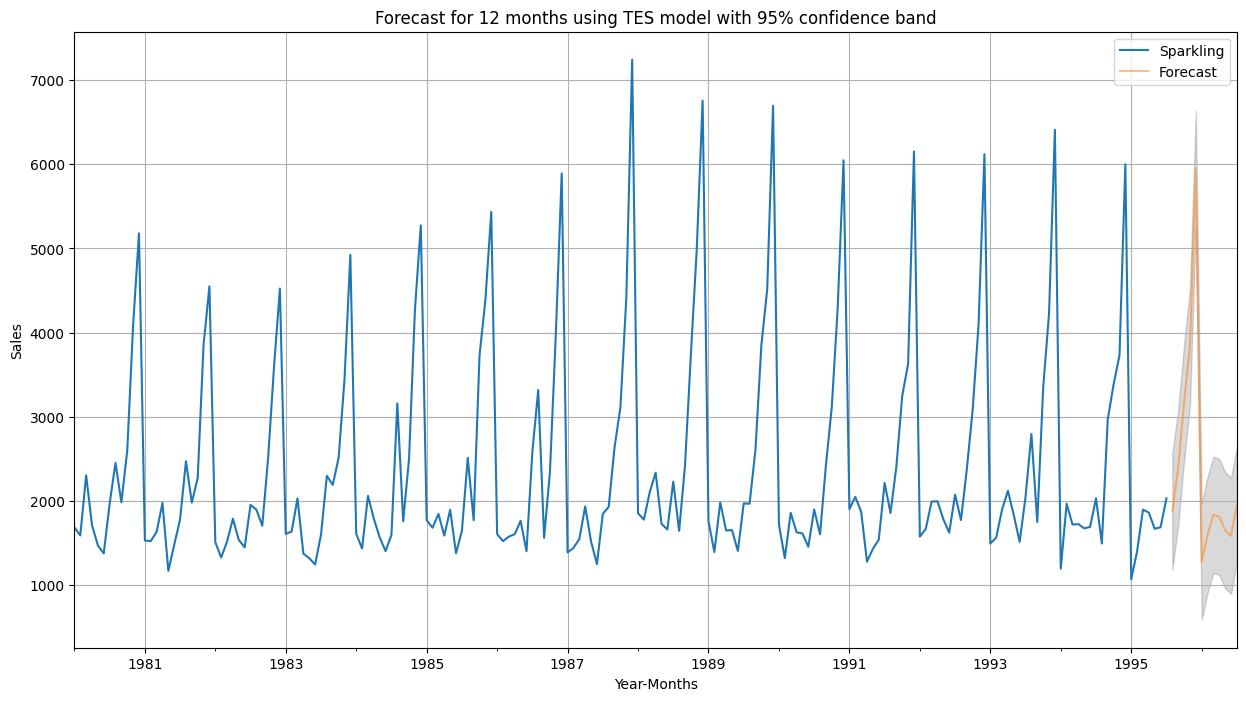

In [ ]:
axis = df.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.title("Forecast for 12 months using TES model with 95% confidence band")
plt.show()

###5.SARIMA (1,1,2)(1,0,2,12) forecast

In [ ]:
full_model3= sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_model3 = full_model3.fit(maxiter=1000)
print(results_full_model3.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sat, 10 Jun 2023   AIC                           2360.827
Time:                                    11:24:18   BIC                           2382.309
Sample:                                01-31-1980   HQIC                          2369.551
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6610      0.242     -2.734      0.006      -1.135      -0.187
ma.L1         -0.2739      0.200   

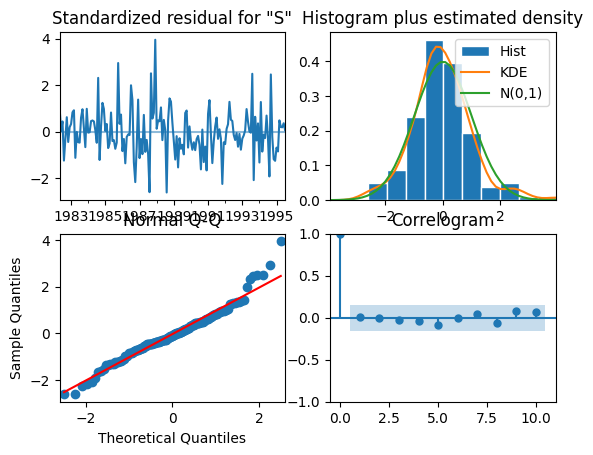

In [ ]:
results_full_model3.plot_diagnostics();

In [ ]:
predicted_manual_SARIMA_full_data = results_full_model3.get_forecast(steps=12)

In [ ]:
predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1836.367093  379.710188    1092.148801    2580.585385
1995-09-30  2489.589237  384.474504    1736.033056    3243.145418
1995-10-31  3324.586557  384.580305    2570.823009    4078.350105
1995-11-30  4020.224547  386.338744    3263.014522    4777.434571
1995-12-31  6289.999972  386.393292    5532.683035    7047.316909
1996-01-31  1244.690294  387.303811     485.588774    2003.791815
1996-02-29  1533.142520  387.532185     773.593395    2292.691645
1996-03-31  1821.702218  388.159318    1060.923933    2582.480502
1996-04-30  1788.492996  388.499401    1027.048163    2549.937830
1996-05-31  1627.566794  389.018579     865.104390    2390.029197
1996-06-30  1563.321091  389.414529     800.082639    2326.559542
1996-07-31  2000.702985  389.889175    1236.534244    2764.871726

In [ ]:
rmse_full = mean_squared_error(df['Sparkling'],results_full_model3.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_full)

RMSE of the Full Model 539.9853944534857


In [ ]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

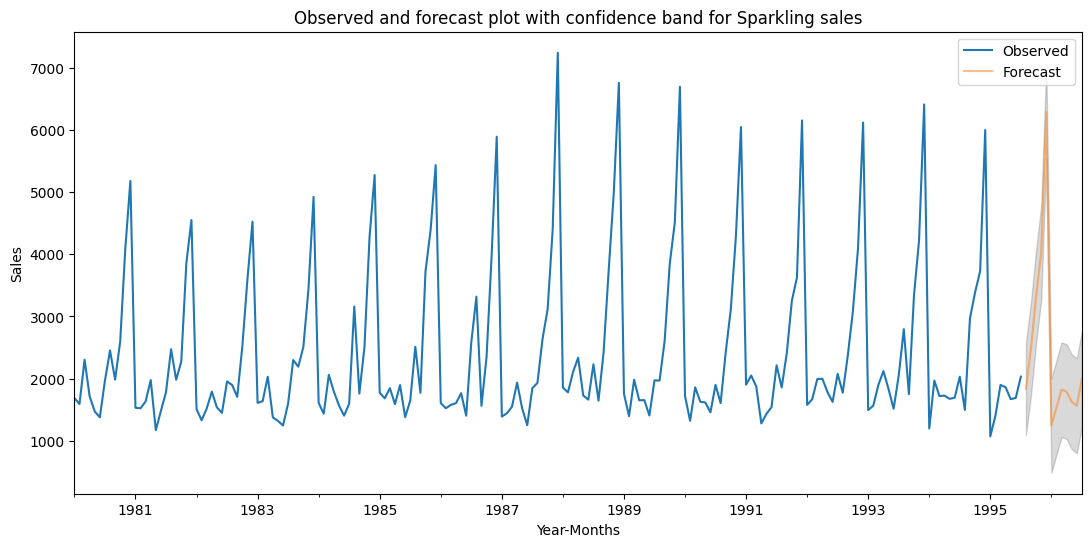

In [ ]:
plt.figure(figsize=(13,6))
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'],
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("Observed and forecast plot with confidence band for Sparkling sales")
plt.show()